# PROJET 6 : ANALYSE DES VENTES D'UNE LIBRAIRIE

### PARTIE 1 : IMPORTATION ET NETTOYAGE DES DONNEES

### PARTIE 2 : ANALYSE DES DONNEES

### PARTIE 1 : IMPORTATION ET NETTOYAGE DES DONNEES

In [194]:
import numpy as np 
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt # visualisation des données
import seaborn as sns




## Tests statistiques

from scipy.stats import ttest_1samp       # Test d'un seul échantillon contre une valeur
from scipy.stats import f_oneway          # liaison entre 1 variable quantitative et 1 variable  
from scipy.stats import chi2_contingency  # qualitative (Anova) sert à comparer deux  
from scipy.stats import chi2              # distributions permet de dire s’il y a indépendance ou non entre nos variables 
from scipy.stats import pearsonr        ### trouver le coefficient de corrélation de Pearson, qui représente les 
                                          # relations linéaires entre deux variables. Il donne également la 
                                          # p-value pour tester la non-corrélation 
from scipy.stats import mannwhitneyu     ### est un test statistique non paramétrique qui permet de tester l'
                                          # hypothèse selon laquelle les distributions de chacun de deux groupes de
                                          # données sont proches

        
        
##  datetime fournit des classes permettant de manipuler les dates et les heures.

from datetime import datetime
from datetime import tzinfo # Une classe de base abstraite pour les objets portants des 
                            # informations sur les fuseaux horaires.
from datetime import timedelta # Une durée qui exprime la différence entre deux instances de 
                               # date, time ou datetime en microsecondes.

 


In [195]:
clients = pd.read_csv("customers.csv") # importation base de données
produits = pd.read_csv("products.csv") # importation base de données
transactions = pd.read_csv("transactions.csv") # importation base de données


###  Création d'une fonction pour les tests d'unicité à venir .  On peut y associer  df.any() ou df.sum() pour avoir une vue synthétique.

In [196]:
def test_unique(df, col):
    is_unique = ~df[col].duplicated().any()
    if is_unique :
        print("La colonne ne posséde pas de valeurs dupliquées, elle peut donc être utilisée comme clé primaire")
    else:
        print("\033[1;31mATTENTION La colonne posséde  des valeurs dupliquées")


In [197]:
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [198]:
clients.shape

(8623, 3)

In [199]:
# changer "Col" en type catégorie
clients["birth"] = clients["birth"].astype("category")

In [200]:
clients.info

<bound method DataFrame.info of      client_id sex birth
0       c_4410   f  1967
1       c_7839   f  1975
2       c_1699   f  1984
3       c_5961   f  1962
4       c_5320   m  1943
...        ...  ..   ...
8618    c_7920   m  1956
8619    c_7403   f  1970
8620    c_5119   m  1974
8621    c_5643   f  1968
8622      c_84   f  1982

[8623 rows x 3 columns]>

In [201]:
clients

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [202]:
clients.nunique()

client_id    8623
sex             2
birth          76
dtype: int64

In [203]:
clients.isnull().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [204]:
clients.isna().sum()

client_id    0
sex          0
birth        0
dtype: int64

In [205]:
# Afficher uniquement les variables de la colonne 'sex'
clients['sex'].unique()

array(['f', 'm'], dtype=object)

In [206]:
test_unique(clients, "client_id")

La colonne ne posséde pas de valeurs dupliquées, elle peut donc être utilisée comme clé primaire


In [207]:
produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [208]:
produits.nunique()

id_prod    3287
price      1455
categ         3
dtype: int64

In [209]:
# changer "Col" en type catégorie
produits["categ"] = produits["categ"].astype("category")

In [210]:
produits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   id_prod  3287 non-null   object  
 1   price    3287 non-null   float64 
 2   categ    3287 non-null   category
dtypes: category(1), float64(1), object(1)
memory usage: 54.8+ KB


In [211]:
produits.shape

(3287, 3)

In [212]:
produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [213]:
test_unique(produits, "id_prod")

La colonne ne posséde pas de valeurs dupliquées, elle peut donc être utilisée comme clé primaire


In [214]:
produits.isnull().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [215]:
produits.describe(include = 'all')

,id_prod,price,categ
count,3287,3287.000000,3287.0
unique,3287,NaN,3.0
top,0_1421,NaN,0.0
freq,1,NaN,2309.0
mean,NaN,21.856641,NaN
std,NaN,29.847908,NaN
min,NaN,-1.000000,NaN
25%,NaN,6.990000,NaN
50%,NaN,13.060000,NaN
75%,NaN,22.990000,NaN


In [216]:
produits[(produits.values.ravel() == -1.000000).reshape(produits.shape).any(1)]


,id_prod,price,categ
731,T_0,-1.0,0


In [217]:
produits[produits.isin([-1.000000])].stack() # level 0 index is row index , level 1 index is columns which contain that value 


731  price   -1.0
dtype: object

In [218]:
produits.drop([731], axis=0, inplace=True)


In [219]:
produits

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [220]:
produits[(produits.values.ravel() == -1.000000).reshape(produits.shape).any(1)]


,id_prod,price,categ


In [221]:
# Afficher uniquement les variables de la colonne 'categ'
produits['categ'].unique()

[0, 1, 2]
Categories (3, int64): [0, 1, 2]

In [222]:
produits.isna().sum()

id_prod    0
price      0
categ      0
dtype: int64

In [223]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [224]:
transactions.nunique()

id_prod         3267
date          679371
session_id    342316
client_id       8602
dtype: int64

In [225]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [226]:
transactions.shape

(679532, 4)

In [227]:
test_unique(transactions, "session_id")

ATTENTION La colonne posséde  des valeurs dupliquées


In [228]:
transactions.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [229]:
transactions.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64

In [230]:
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


### JOINTURES

In [231]:
clt_transac = pd.merge(transactions, clients, how = "outer", on = "client_id", indicator = True)

In [232]:
clt_transac

,id_prod,date,session_id,client_id,sex,birth,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,both
1,0_1627,2022-06-18 05:55:31.816994,s_225494,c_103,f,1986,both
2,0_1104,2023-02-08 17:31:06.898425,s_338755,c_103,f,1986,both
3,0_1390,2021-04-20 06:18:39.939761,s_23078,c_103,f,1986,both
4,0_1547,2022-03-15 19:54:53.904123,s_179629,c_103,f,1986,both
...,...,...,...,...,...,...,...
679548,NaN,NaN,NaN,c_862,f,1956,right_only
679549,NaN,NaN,NaN,c_7584,f,1960,right_only
679550,NaN,NaN,NaN,c_90,m,2001,right_only
679551,NaN,NaN,NaN,c_587,m,1993,right_only


In [233]:
clt_transac.loc[clt_transac["_merge"]=="right_only"]

,id_prod,date,session_id,client_id,sex,birth,_merge
679532,NaN,NaN,NaN,c_8253,f,2001,right_only
679533,NaN,NaN,NaN,c_3789,f,1997,right_only
679534,NaN,NaN,NaN,c_4406,f,1998,right_only
679535,NaN,NaN,NaN,c_2706,f,1967,right_only
679536,NaN,NaN,NaN,c_3443,m,1959,right_only
679537,NaN,NaN,NaN,c_4447,m,1956,right_only
679538,NaN,NaN,NaN,c_3017,f,1992,right_only
679539,NaN,NaN,NaN,c_4086,f,1992,right_only
679540,NaN,NaN,NaN,c_6930,m,2004,right_only
679541,NaN,NaN,NaN,c_4358,m,1999,right_only


In [234]:
clt_transac.loc[clt_transac["_merge"]=="right_only", "client_id"].nunique()

21

In [235]:
clt_transac.loc[clt_transac["_merge"]=="left_only"]

,id_prod,date,session_id,client_id,sex,birth,_merge


## Il a 23 clients dans la base qui n'ont rien acheté

In [236]:
clt_transac = clt_transac.dropna()

In [237]:
# Afficher uniquement les variables de la colonne '_merge'
clt_transac['_merge'].unique()

['both']
Categories (3, object): ['left_only', 'right_only', 'both']

In [238]:
clt_transac["_merge"].value_counts()

both          679532
left_only          0
right_only         0
Name: _merge, dtype: int64

In [239]:
clt_transac.drop(columns = "_merge", inplace = True)

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/1396376283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clt_transac.drop(columns = "_merge", inplace = True)


In [240]:
clt_transac.count()

id_prod       679532
date          679532
session_id    679532
client_id     679532
sex           679532
birth         679532
dtype: int64

In [241]:
test_unique(clt_transac,"session_id" )

ATTENTION La colonne posséde  des valeurs dupliquées


In [242]:
clt_transac.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
dtype: int64

In [243]:
clt_transac_pdt = pd.merge(clt_transac, produits, how = "outer", on = "id_prod", indicator = True)

In [244]:
clt_transac_pdt

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0,both
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0,both
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0,both
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0,both
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0,both
...,...,...,...,...,...,...,...,...,...
679548,0_1624,NaN,NaN,NaN,NaN,NaN,24.50,0,right_only
679549,2_86,NaN,NaN,NaN,NaN,NaN,132.36,2,right_only
679550,0_299,NaN,NaN,NaN,NaN,NaN,22.99,0,right_only
679551,0_510,NaN,NaN,NaN,NaN,NaN,23.66,0,right_only


In [245]:
# Afficher uniquement les variables de la colonne '_merge'
clt_transac_pdt['_merge'].unique()

['both', 'left_only', 'right_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [246]:
clt_transac_pdt.loc[clt_transac_pdt["_merge"]=="right_only"]

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
679532,0_1016,NaN,NaN,NaN,NaN,NaN,35.06,0,right_only
679533,0_1780,NaN,NaN,NaN,NaN,NaN,1.67,0,right_only
679534,0_1062,NaN,NaN,NaN,NaN,NaN,20.08,0,right_only
679535,0_1119,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only
679536,0_1014,NaN,NaN,NaN,NaN,NaN,1.15,0,right_only
679537,1_0,NaN,NaN,NaN,NaN,NaN,31.82,1,right_only
679538,0_1318,NaN,NaN,NaN,NaN,NaN,20.92,0,right_only
679539,0_1800,NaN,NaN,NaN,NaN,NaN,22.05,0,right_only
679540,0_1645,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only
679541,0_322,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only


In [247]:
clt_transac_pdt['_merge'].value_counts()

both          679111
left_only        421
right_only        21
Name: _merge, dtype: int64

In [248]:
clt_transac_pdt.loc[clt_transac_pdt["_merge"]=="right_only"]

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
679532,0_1016,NaN,NaN,NaN,NaN,NaN,35.06,0,right_only
679533,0_1780,NaN,NaN,NaN,NaN,NaN,1.67,0,right_only
679534,0_1062,NaN,NaN,NaN,NaN,NaN,20.08,0,right_only
679535,0_1119,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only
679536,0_1014,NaN,NaN,NaN,NaN,NaN,1.15,0,right_only
679537,1_0,NaN,NaN,NaN,NaN,NaN,31.82,1,right_only
679538,0_1318,NaN,NaN,NaN,NaN,NaN,20.92,0,right_only
679539,0_1800,NaN,NaN,NaN,NaN,NaN,22.05,0,right_only
679540,0_1645,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only
679541,0_322,NaN,NaN,NaN,NaN,NaN,2.99,0,right_only


### Il y a 21 produits qui n'ont jamais été acheté

In [249]:
clt_transac_pdt.loc[clt_transac_pdt["_merge"]=="left_only"]

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
678910,T_0,test_2021-03-01 02:30:02.237420,s_0,ct_1,m,2001,NaN,NaN,left_only
678911,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1,m,2001,NaN,NaN,left_only
678912,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1,m,2001,NaN,NaN,left_only
678913,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1,m,2001,NaN,NaN,left_only


In [250]:
clt_transac_pdt.loc[clt_transac_pdt["_merge"] == "left_only", 'id_prod'].nunique()

2

In [251]:
clt_transac_pdt.loc[clt_transac_pdt["id_prod"] == "0_2245"].nunique()

id_prod         1
date          221
session_id    221
client_id     100
sex             2
birth          35
price           0
categ           0
_merge          1
dtype: int64

## Il y a un produit qui n'a pas de prix ni catégorie
## 221 achats du produit 0_2245  dont on ne connait ni le prix ni la catégorie

#### Valeurs manquantes produit 0_2245
#### Reste à choisir une méthode pour traiter les valeurs manquantes du produit 0_2245, à savoir son prix et sa catégorie. Pour gérer les valeurs manquantes, 2 méthodes sont envisageables :
- supprimer les lignes concernées
- déterminer une valeur fixe par la moyenne ou la médiane

In [252]:
produit_2245 = clt_transac_pdt[clt_transac_pdt['id_prod']=='0_2245'] #  produit 0_2245
produit_2245

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968,NaN,NaN,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968,NaN,NaN,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968,NaN,NaN,left_only
311750,0_2245,2022-05-05 17:04:43.982913,s_204093,c_6714,f,1968,NaN,NaN,left_only
311751,0_2245,2022-12-05 17:04:43.982913,s_307520,c_6714,f,1968,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...
311963,0_2245,2021-10-19 09:32:03.667461,s_107022,c_6128,m,1986,NaN,NaN,left_only
311964,0_2245,2021-11-12 09:25:22.905886,s_118458,c_7416,m,1933,NaN,NaN,left_only
311965,0_2245,2021-08-22 08:51:27.564509,s_79102,c_6752,m,1987,NaN,NaN,left_only
311966,0_2245,2022-04-22 08:51:27.564509,s_197669,c_6752,m,1987,NaN,NaN,left_only


In [253]:
# Pourcentage du nombre des ventes du produit 0_2245
print('Produit 0_2245 :', round((len(produit_2245) / len(clt_transac_pdt) * 100), 2), '% du dataframe')

Produit 0_2245 : 0.03 % du dataframe


- Produit 0_2245 : 0.03 % du dataframe
- Pour la catégorie, on peut se fier aux préfixes des identifiants de produits : 0_, 1_ et 2_. Ces préfixes correspondent invariablement à la catégorie du produit concerné. On choisit donc 0 comme catégorie du produit 0_2245.

In [254]:
# Remplacer les NaN de la colonne 'categ'en 0 pour les lignes où 'id_prod' est égal à '0_2245'
clt_transac_pdt.loc[clt_transac_pdt['id_prod'] == '0_2245', 'categ'] = 0

#### Remplacer les valeurs manquantes par la médiane de la colonne "price" de "id_prod" = 0_2245

In [255]:
# filtrer le DataFrame pour n'inclure que les lignes avec "id_prod" == "0_2245" et "price" == NaN
clt_transac_pdt_temp = clt_transac_pdt[(clt_transac_pdt['id_prod'] == '0_2245') & (clt_transac_pdt['price'].isnull())]

In [256]:
# obtenir la catégorie de ces produits
category = clt_transac_pdt_temp.iloc[0]['categ']

In [257]:
# calcul de la moyenne des prix de la 'categ' 0
category_mean = clt_transac_pdt[clt_transac_pdt['categ'] == category]['price'].mean()

In [258]:
category_mean

10.63832969498281

In [259]:
# calcul de la mediane des prix de la 'categ' 0
category_median = clt_transac_pdt[clt_transac_pdt['categ'] == 0]['price'].median()

In [260]:
category_median

9.99

#### La médianne et la moyenne étant proche, nous allons choisir la médianne (évite les outliers).

In [261]:
# imputation de la moyenne aux valeurs manquantes
# clt_transac_pdt.loc[mask, 'price'] = mean_price
clt_transac_pdt.loc[(clt_transac_pdt['id_prod'] == '0_2245') & (clt_transac_pdt['price'].isnull()), 'price'] = category_median

In [262]:
produit_2245 = clt_transac_pdt[clt_transac_pdt['id_prod'] == '0_2245']
produit_2245.head(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ,_merge
311747,0_2245,2021-04-22 04:57:20.090378,s_23987,c_6714,f,1968,9.99,0,left_only
311748,0_2245,2021-06-05 17:04:43.982913,s_44481,c_6714,f,1968,9.99,0,left_only
311749,0_2245,2022-04-05 17:04:43.982913,s_189669,c_6714,f,1968,9.99,0,left_only


In [263]:
clt_transac_pdt = clt_transac_pdt.dropna()

In [264]:
clt_transac_pdt["_merge"].value_counts()

both          679111
left_only        221
right_only         0
Name: _merge, dtype: int64

In [265]:
clt_transac_pdt.drop(columns = "_merge", inplace = True)

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/655042900.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clt_transac_pdt.drop(columns = "_merge", inplace = True)


In [266]:
clt_transac_pdt

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0
...,...,...,...,...,...,...,...,...
679527,1_408,2023-01-26 06:52:02.225335,s_332548,c_7402,m,1945,35.24,1
679528,1_408,2022-11-26 06:52:02.225335,s_302962,c_7402,m,1945,35.24,1
679529,1_408,2021-09-26 06:52:02.225335,s_95708,c_7402,m,1945,35.24,1
679530,2_81,2022-02-19 14:51:58.078656,s_167662,c_7616,m,1993,86.99,2


In [267]:
clt_transac_pdt.isna().sum()

id_prod       0
date          0
session_id    0
client_id     0
sex           0
birth         0
price         0
categ         0
dtype: int64

In [268]:
clt_transac_pdt_original = clt_transac_pdt

In [269]:
clt_transac_pdt_original.head(10)

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0
3,0_1518,2021-05-09 11:52:55.100386,s_32104,c_6714,f,1968,4.18,0
4,0_1518,2022-05-30 01:17:07.487046,s_216118,c_6714,f,1968,4.18,0
5,0_1518,2023-02-09 11:52:55.100386,s_339104,c_6714,f,1968,4.18,0
6,0_1518,2021-10-23 21:58:50.700370,s_109153,c_6714,f,1968,4.18,0
7,0_1518,2022-10-30 01:17:07.487046,s_289949,c_6714,f,1968,4.18,0
8,0_1518,2022-05-09 11:52:55.100386,s_205930,c_6714,f,1968,4.18,0
9,0_1518,2021-04-30 01:17:07.487046,s_27717,c_6714,f,1968,4.18,0


In [270]:
# indexer la colonne date et conversion en datetime
clt_transac_pdt['date']=pd.to_datetime(clt_transac_pdt['date'])
clt_transac_pdt=clt_transac_pdt.set_index('date')
clt_transac_pdt.head()

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/4186896042.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clt_transac_pdt['date']=pd.to_datetime(clt_transac_pdt['date'])


,id_prod,session_id,client_id,sex,birth,price,categ
date,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0


In [271]:
# création des colonnes : année,mois,heure et jour
clt_transac_pdt['année'] = clt_transac_pdt.index.year
clt_transac_pdt['mois'] = clt_transac_pdt.index.month
clt_transac_pdt['heure'] = clt_transac_pdt.index.hour
clt_transac_pdt['jour'] = clt_transac_pdt.index.day_name()
clt_transac_pdt.head()

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday


In [272]:
clt_transac_pdt

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 06:52:02.225335,1_408,s_332548,c_7402,m,1945,35.24,1,2023,1,6,Thursday
2022-11-26 06:52:02.225335,1_408,s_302962,c_7402,m,1945,35.24,1,2022,11,6,Saturday
2021-09-26 06:52:02.225335,1_408,s_95708,c_7402,m,1945,35.24,1,2021,9,6,Sunday


In [273]:
# Vérifications des statistiques des colonnes
clt_transac_pdt.describe()

,price,année,mois,heure
count,679332.000000,679332.000000,679332.000000,679332.000000
mean,17.452345,2021.670503,6.504354,11.520273
std,18.326510,0.617553,3.480716,6.917353
min,0.620000,2021.000000,1.000000,0.000000
25%,8.870000,2021.000000,3.000000,6.000000
50%,13.990000,2022.000000,6.000000,12.000000
75%,18.990000,2022.000000,9.000000,18.000000
max,300.000000,2023.000000,12.000000,23.000000


### PARTIE 2 : ANALYSE DES DONNEES

#### 1. EVOLUTION DU CHIFFRE D'AFFAIRE DANS LE TEMPS
   - Chiffre d'affaire total
   - Chiffre d'affaire annuel
   - Chiffre d'affaire mensuel

In [274]:
debut_date = clt_transac_pdt.index.min()
debut_date

Timestamp('2021-03-01 00:01:07.843138')

In [275]:
debut_date = clt_transac_pdt.index.max()
debut_date

Timestamp('2023-02-28 23:58:30.792755')

### CA total des 3 années

- du 01-03-2021 au 31-12-2021 (10 mois)
- du 01-01-2022 au 31-12-2022 (12 mois)
- du 01-01-2023 au 28-02-2022 (2 mois)

In [276]:
# Afficher le chiffre d'affaire annuel
total_ca = clt_transac_pdt.loc[:, "price"].sum()
print("La chiffre d'affaire total est de", round(total_ca, 2),".")

La chiffre d'affaire total est de 11855936.47 .


In [277]:
nb_vente = clt_transac_pdt['session_id'].count()
print("Le total du nombre de vente, sans octobre 2021, est de: ", nb_vente )

Le total du nombre de vente, sans octobre 2021, est de:  679332


In [278]:
panier_moyen = round((total_ca/ nb_vente),2)
print("Le panier moyen est de: ", panier_moyen," euros.")

Le panier moyen est de:  17.45  euros.


### CA total par année


In [279]:
# Afficher le chiffre d'affaire annuel
ca_annee = round(clt_transac_pdt['price'].resample('Y').agg(['sum']))
ca_annee.rename(columns ={"sum": "chiffre_affaire","date": "année"}, inplace= True)
ca_annee["% ca_total_3_exercices"] = (ca_annee["chiffre_affaire"] / total_ca) * 100
ca_annee.head()

,chiffre_affaire,% ca_total_3_exercices
date,,
2021-12-31,4771696.0,40.247314
2022-12-31,6109881.0,51.534360
2023-12-31,974360.0,8.218330


In [280]:
# Afficher le chiffre d'affaire mensuel
ca_mensuel = clt_transac_pdt['price'].resample('M').agg(['sum']).reset_index()
ca_mensuel.rename(columns ={"sum": "ca_mensuel"},inplace =True)
ca_mensuel.head()

,date,ca_mensuel
0,2021-03-31,482530.52
1,2021-04-30,476249.16
2,2021-05-31,493023.39
3,2021-06-30,484158.49
4,2021-07-31,482875.36


### CA moyenne mobile

In [281]:
ca_mensuel.rolling(7, min_periods=1).mean()

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/2915603379.py:1: FutureWarning: Dropping of nuisance columns in rolling operations is deprecated; in a future version this will raise TypeError. Select only valid columns before calling the operation. Dropped columns were Index(['date'], dtype='object')
  ca_mensuel.rolling(7, min_periods=1).mean()


,ca_mensuel
0,482530.520000
1,479389.840000
2,483934.356667
3,483990.390000
4,483767.384000
5,483535.270000
6,486938.882857
7,463844.332857
8,469561.257143
9,474270.374286


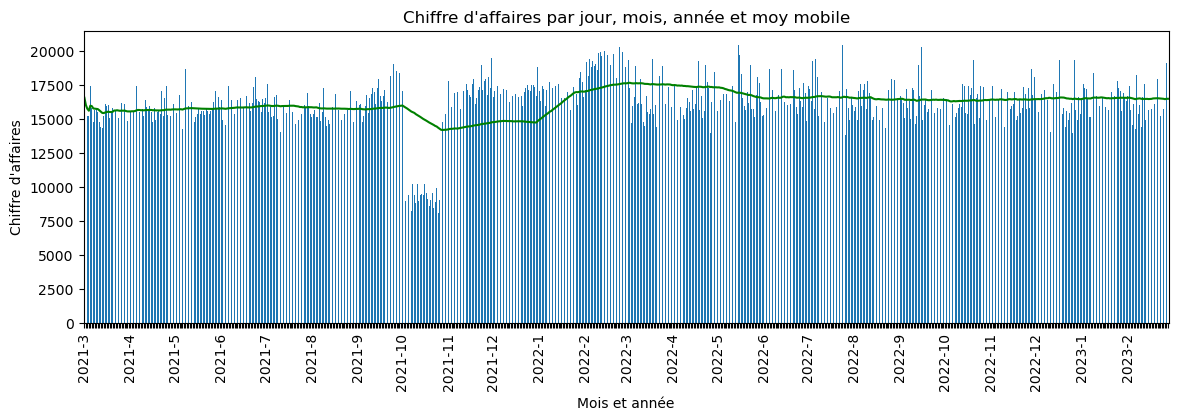

In [282]:
# Groupement des données par mois et année et calcul du chiffre d'affaires pour chaque mois et année
ca_jour_mois_an = clt_transac_pdt_original.groupby([clt_transac_pdt_original['date'].dt.year,
                                                    clt_transac_pdt_original['date'].dt.month,
                                                    clt_transac_pdt_original['date'].dt.day])['price'].sum()
ca_jour_mois_an_lisse = ca_jour_mois_an.rolling(90, min_periods=1).mean()

# Création du plot
ca_jour_mois_an_lisse.plot(kind='line', color="g")
ca_jour_mois_an.plot(kind='bar')

labels = [f"{y}-{m}" if d == 1 else "" for y, m, d in ca_jour_mois_an.index]
plt.xticks(range(len(labels)), labels)

plt.xlabel('Mois et année')
plt.ylabel('Chiffre d\'affaires')
plt.title('Chiffre d\'affaires par jour, mois, année et moy mobile')
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.15)

## Détection de valeurs aberrantes et analyse des résultats

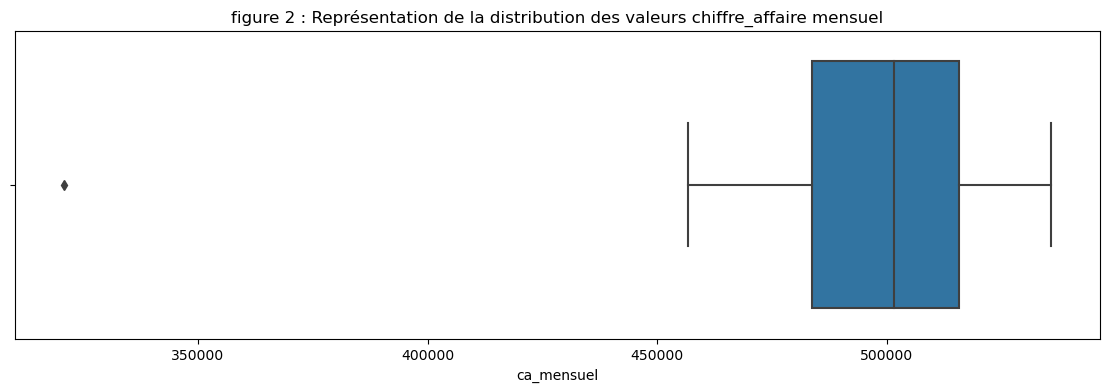

In [283]:
# boite à moustache representant la distribution de la valeur chiffre d'affaire mensuel
fig_BoitaMoust_ca_mens = sns.boxplot(x = "ca_mensuel", data = ca_mensuel)
plt.title('figure 2 : Représentation de la distribution des valeurs chiffre_affaire mensuel')
# fig_BoitaMoust_ca_mens.savefig("fig_BoitaMoust_ca_mens.png", bbox_inches = "tight")
plt.show()


- Les résultats obtenus montrent que la valeur du chiffre d'affaires pour le mois d'octobre est une valeur aberrante. En effet, l'observation du graphique, de l'histogramme et de la boîte à moustaches révèle que cette valeur est complètement décalée du reste des valeurs et se trouve en dehors de l'extrémité gauche de la moustache. De plus, le calcul de l'indicateur d'asymétrie confirme que cette valeur est très éloignée de la moyenne.

- En analysant le chiffre d'affaires du mois d'octobre par catégorie de produits, on remarque que la catégorie 1 en particulier, ainsi que la catégorie 2, présentent des chiffres d'affaires très bas. Cela pourrait expliquer le chiffre d'affaires anormalement bas pour ce mois-là, et il est possible que ces catégories aient subi une rupture de stocks.

- En conclusion, la valeur du chiffre d'affaires pour le mois d'octobre sera supprimée pour éviter tout biais dans les analyses. Des investigations doivent être menées pour comprendre les raisons de cette anomalie.


#### LA FORME DE DISTRIBUTION DU CA MENSUEL

In [284]:
# Calculer la symertie de la distribution
# ca_mensuel['ca_mensuel'].skew()
ca_mensuel["ca_mensuel"].skew(skipna = True)

-3.4232567813030905

Lorsque la Skewness est égale 0, le dataset est symétrique.

Mais cette mesure nous renseigne aussi sur le type d’asymétrie.

Si la Skewness est supérieur à 0, alors le dataset est skewed sur la droite. C’est à dire que la majorité des données se trouvent sur la gauche et les outliers se trouvent sur la droite.

Si la Skewness est inférieur à 0, alors le dataset est skewed sur la gauche. C’est à dire que la majorité des données se trouvent sur la droite et les outliers se trouvent sur la gauche.

In [285]:
ca_mens = ca_mensuel["ca_mensuel"]

### on calcule les quartiles

In [286]:
Q3, Q1 = np.percentile(ca_mens, [75, 25])
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
upper= ca_mens[ca_mens > upper_bound]
lower= ca_mens[ca_mens <lower_bound]

<AxesSubplot:xlabel='ca_mensuel', ylabel='Count'>

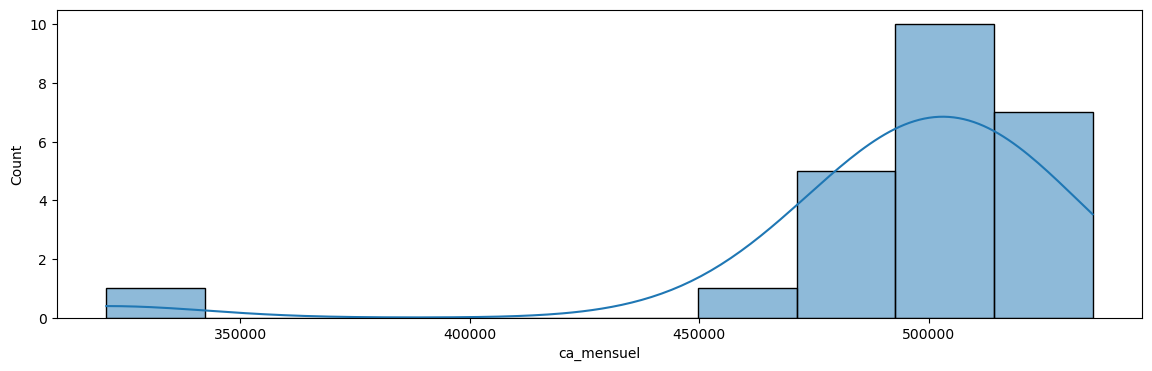

In [287]:
# Visualisation
fig_tend_ca_mensuel = sns.histplot(data = ca_mensuel, x = "ca_mensuel", kde=True)
fig_tend_ca_mensuel

In [288]:
upper

Series([], Name: ca_mensuel, dtype: float64)

In [289]:
lower

7    320868.67
Name: ca_mensuel, dtype: float64

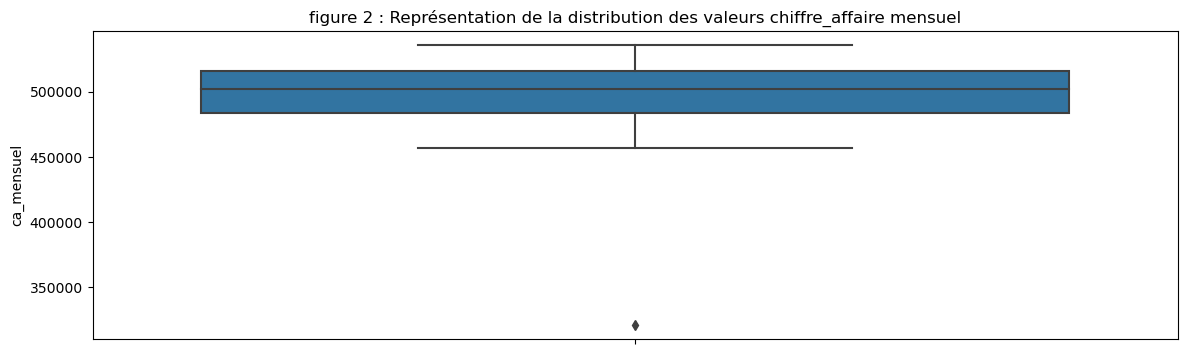

In [290]:
# boite à moustache representant la distribution de la valeur chiffre d'affaire mensuel
fig_BoitaMoust_ca_mens = sns.boxplot(y = "ca_mensuel", data = ca_mensuel)
plt.title('figure 2 : Représentation de la distribution des valeurs chiffre_affaire mensuel')
# fig_BoitaMoust_ca_mens.savefig("fig_BoitaMoust_ca_mens.png", bbox_inches = "tight")
plt.show()

### on calcule les valeurs limites

In [291]:
lim_inf = Q1 - (1.5 * IQR)
lim_sup = Q3 + (1.5 * IQR)

In [292]:
ca_m_outlier = ca_mensuel[(ca_mensuel["ca_mensuel"] > lim_sup) | (ca_mensuel["ca_mensuel"] < lim_inf)]
ca_m_outlier

,date,ca_mensuel
7,2021-10-31,320868.67


In [293]:
# Calculer les chiffres d'affaire pour le mois d'octobre et par catégorie
ca_oct_21_categ = round(clt_transac_pdt[clt_transac_pdt.index.strftime('%Y-%m') == '2021-10'].groupby('categ')['price'].agg(['sum']))
ca_oct_21_categ.rename(columns ={"sum": "chiffre_affaire_p_categ"}, inplace= True)
ca_oct_21_categ["% ca_oct_21"] = (ca_oct_21_categ["chiffre_affaire_p_categ"] / ca_oct_21_categ["chiffre_affaire_p_categ"].sum()) * 100

ca_oct_21_categ.head()


,chiffre_affaire_p_categ,% ca_oct_21
categ,,
0,199321.0,62.119120
1,33762.0,10.522051
2,87786.0,27.358829


In [294]:
print("Le ca de la catégorie 0 est de ", ca_oct_21_categ.loc[0, "chiffre_affaire_p_categ"] ,
      "sur", ca_oct_21_categ["chiffre_affaire_p_categ"].sum(), "ca total. C'est à dire",
      round(ca_oct_21_categ.loc[0, "chiffre_affaire_p_categ"] / ca_oct_21_categ["chiffre_affaire_p_categ"].sum() * 100, 2),"% du chiffre d'affaire total")

print("Le ca de la catégorie 1 est de ", ca_oct_21_categ.loc[1, "chiffre_affaire_p_categ"] ,
      "sur", ca_oct_21_categ["chiffre_affaire_p_categ"].sum(), "ca total. C'est à dire",
      round(ca_oct_21_categ.loc[1, "chiffre_affaire_p_categ"] / ca_oct_21_categ["chiffre_affaire_p_categ"].sum() * 100, 2),"% du chiffre d'affaire total")
print("Le ca de la catégorie 2 est de ", ca_oct_21_categ.loc[2, "chiffre_affaire_p_categ"] ,
      "sur", ca_oct_21_categ["chiffre_affaire_p_categ"].sum(), "ca total. C'est à dire",
      round(ca_oct_21_categ.loc[2, "chiffre_affaire_p_categ"] / ca_oct_21_categ["chiffre_affaire_p_categ"].sum() * 100, 2),"% du chiffre d'affaire total")


Le ca de la catégorie 0 est de  199321.0 sur 320869.0 ca total. C'est à dire 62.12 % du chiffre d'affaire total
Le ca de la catégorie 1 est de  33762.0 sur 320869.0 ca total. C'est à dire 10.52 % du chiffre d'affaire total
Le ca de la catégorie 2 est de  87786.0 sur 320869.0 ca total. C'est à dire 27.36 % du chiffre d'affaire total


<function matplotlib.pyplot.show(close=None, block=None)>

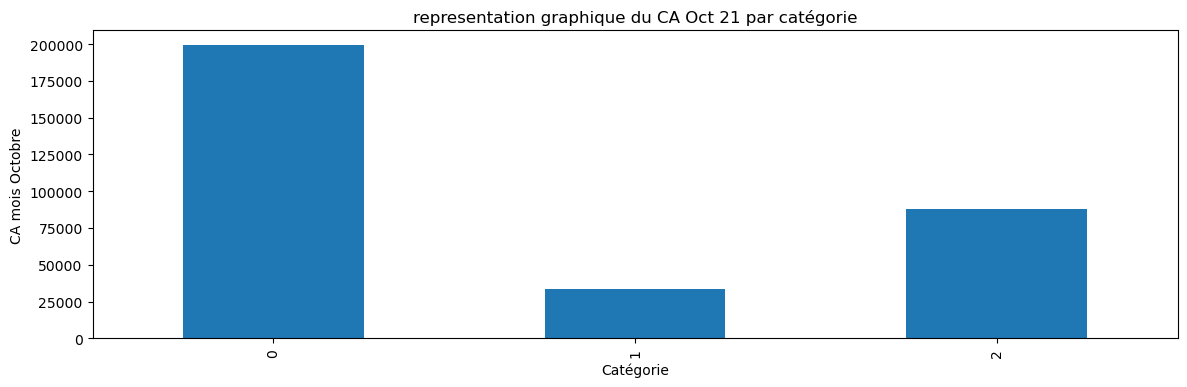

In [295]:
# representation graphique
fig_ca_oct_21_categ = ca_oct_21_categ["chiffre_affaire_p_categ"].plot.bar()
plt.xlabel("Catégorie")
plt.ylabel("CA mois Octobre")
plt.title("representation graphique du CA Oct 21 par catégorie")
fig_ca_oct_21_categ
plt.show

In [296]:
# afficher un graph du mois d'octobre par jour
ca_oct_jour = clt_transac_pdt[clt_transac_pdt.index.strftime('%Y-%m') == '2021-10'].reset_index()
ca_oct_jour['date2'] = ca_oct_jour['date'].dt.strftime('%d-%m-%Y')
ca_oct_jour  

,date,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour,date2
0,2021-10-23 21:58:50.700370,0_1518,s_109153,c_6714,f,1968,4.18,0,2021,10,21,Saturday,23-10-2021
1,2021-10-13 18:00:08.691379,0_1518,s_104281,c_1609,m,1980,4.18,0,2021,10,18,Wednesday,13-10-2021
2,2021-10-18 05:08:38.451377,0_1518,s_106465,c_1609,m,1980,4.18,0,2021,10,5,Monday,18-10-2021
3,2021-10-06 02:28:00.146255,0_1518,s_100641,c_6726,f,1974,4.18,0,2021,10,2,Wednesday,06-10-2021
4,2021-10-12 07:31:49.081831,0_1518,s_103594,c_846,f,1981,4.18,0,2021,10,7,Tuesday,12-10-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,2021-10-04 21:13:09.706161,0_1776,s_100046,c_2496,m,1958,21.16,0,2021,10,21,Monday,04-10-2021
21602,2021-10-17 00:47:44.028933,0_643,s_105868,c_7779,m,1983,0.99,0,2021,10,0,Sunday,17-10-2021
21603,2021-10-23 19:04:21.253947,0_410,s_109088,c_1080,f,1969,25.23,0,2021,10,19,Saturday,23-10-2021
21604,2021-10-27 04:06:23.489895,0_1735,s_110697,c_5216,m,1971,26.99,0,2021,10,4,Wednesday,27-10-2021


#### Evolution du nombre de commandes journalier pour les différentes catégories

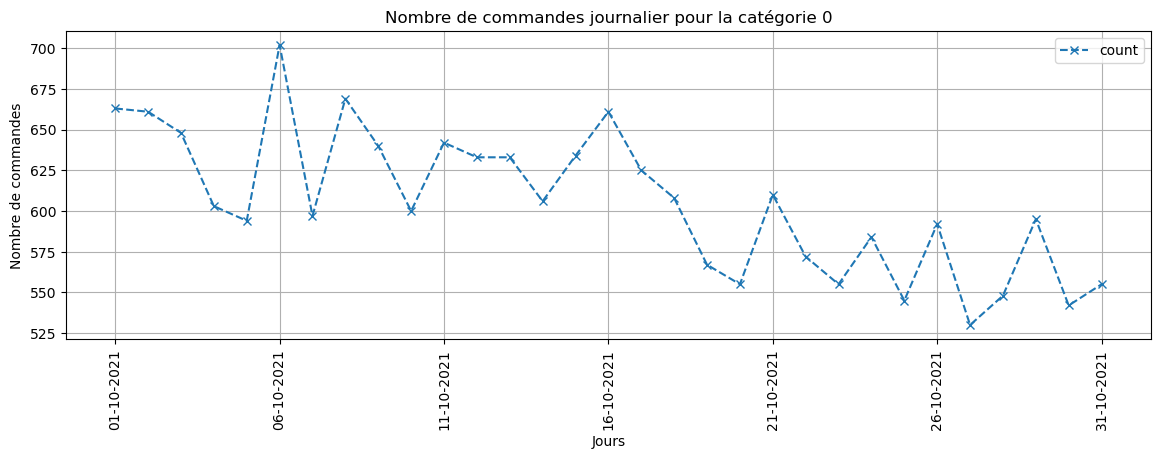

In [297]:
# Afficher le graphique du nombre de commandes par jour pour la catégorie 0
plt.rcParams["figure.figsize"] = (14,4)
ca_oct_jour.loc[ca_oct_jour.categ == 0, ['date2','categ']].groupby('date2')['categ'].agg(["count"]).plot(linestyle = 'dashed',marker = 'x')
plt.xticks(rotation='vertical')
plt.title('Nombre de commandes journalier pour la catégorie 0')
plt.xlabel('Jours')
plt.ylabel('Nombre de commandes')
plt.grid()
plt.show()

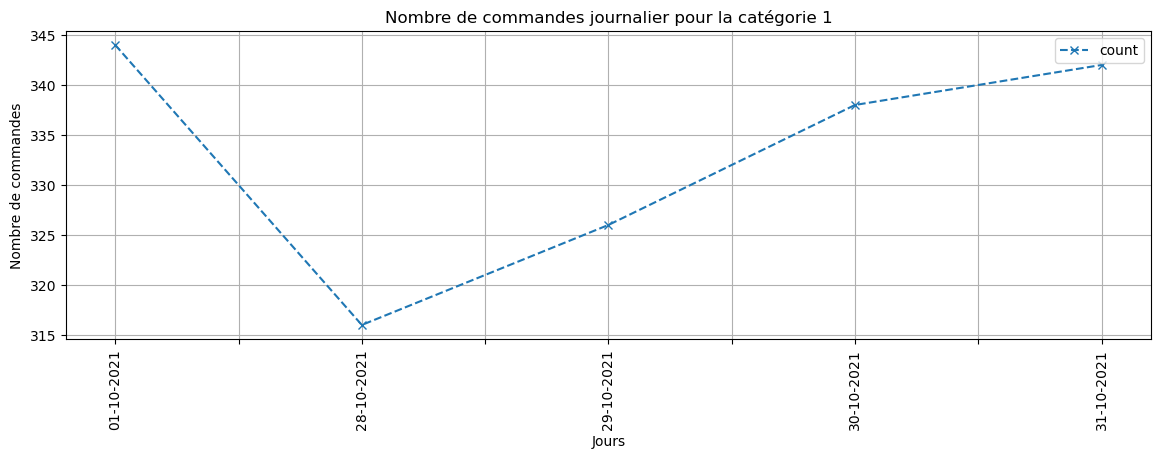

In [298]:
# Afficher le graphique du nombre de commandes par jour pour la catégorie 0
plt.rcParams["figure.figsize"] = (14,4)
ca_oct_jour.loc[ca_oct_jour.categ == 1, ['date2','categ']].groupby('date2')['categ'].agg(["count"]).plot(linestyle = 'dashed',marker = 'x')
plt.xticks(rotation='vertical')
plt.title('Nombre de commandes journalier pour la catégorie 1')
plt.xlabel('Jours')
plt.ylabel('Nombre de commandes')
plt.grid()
plt.show()

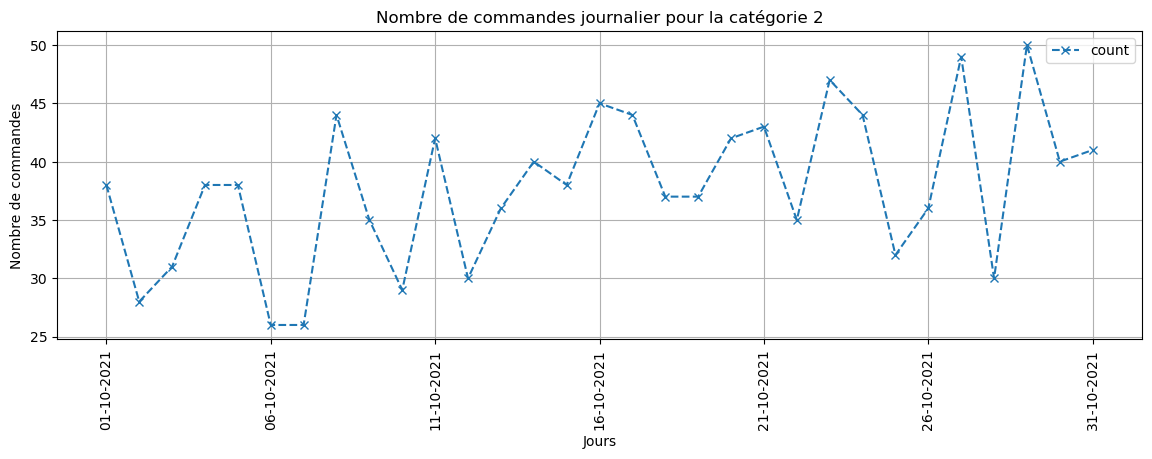

In [299]:
# Afficher le graphique du nombre de commandes par jour pour la catégorie 0
plt.rcParams["figure.figsize"] = (14,4)
ca_oct_jour.loc[ca_oct_jour.categ == 2, ['date2','categ']].groupby('date2')['categ'].agg(["count"]).plot(linestyle = 'dashed',marker = 'x')
plt.xticks(rotation='vertical')
plt.title('Nombre de commandes journalier pour la catégorie 2')
plt.xlabel('Jours')
plt.ylabel('Nombre de commandes')
plt.grid()
plt.show()

In [300]:
clt_transac_pdt_original.head(3)

,id_prod,date,session_id,client_id,sex,birth,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,f,1986,4.18,0
1,0_1518,2021-07-20 13:21:29.043970,s_64849,c_103,f,1986,4.18,0
2,0_1518,2022-08-20 13:21:29.043970,s_255965,c_103,f,1986,4.18,0


In [301]:
# Sélectionner les données pour le mois d'octobre 2021
oct_df = clt_transac_pdt[(clt_transac_pdt["année"] == 2021) & (clt_transac_pdt["mois"] == 10)]# .reset_index(drop = False)
oct_df = oct_df.reset_index(drop = False)

In [302]:
oct_df_0 = oct_df[oct_df["categ"] == 0]
oct_df_0['day'] = oct_df_0['date'].dt.floor('D')
oct_df_0

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/4159884534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_df_0['day'] = oct_df_0['date'].dt.floor('D')


,date,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour,day
0,2021-10-23 21:58:50.700370,0_1518,s_109153,c_6714,f,1968,4.18,0,2021,10,21,Saturday,2021-10-23
1,2021-10-13 18:00:08.691379,0_1518,s_104281,c_1609,m,1980,4.18,0,2021,10,18,Wednesday,2021-10-13
2,2021-10-18 05:08:38.451377,0_1518,s_106465,c_1609,m,1980,4.18,0,2021,10,5,Monday,2021-10-18
3,2021-10-06 02:28:00.146255,0_1518,s_100641,c_6726,f,1974,4.18,0,2021,10,2,Wednesday,2021-10-06
4,2021-10-12 07:31:49.081831,0_1518,s_103594,c_846,f,1981,4.18,0,2021,10,7,Tuesday,2021-10-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21601,2021-10-04 21:13:09.706161,0_1776,s_100046,c_2496,m,1958,21.16,0,2021,10,21,Monday,2021-10-04
21602,2021-10-17 00:47:44.028933,0_643,s_105868,c_7779,m,1983,0.99,0,2021,10,0,Sunday,2021-10-17
21603,2021-10-23 19:04:21.253947,0_410,s_109088,c_1080,f,1969,25.23,0,2021,10,19,Saturday,2021-10-23
21604,2021-10-27 04:06:23.489895,0_1735,s_110697,c_5216,m,1971,26.99,0,2021,10,4,Wednesday,2021-10-27


In [303]:
count_0 = oct_df_0.groupby(oct_df_0['day'].dt.date).size()

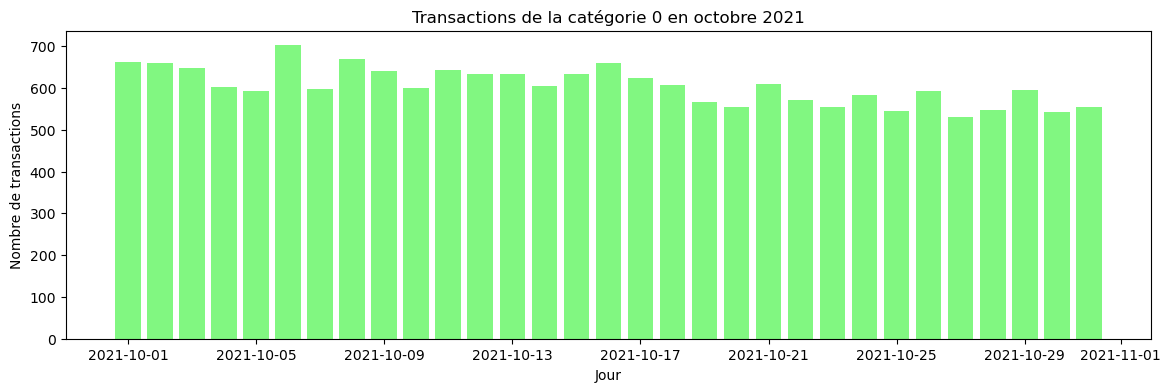

In [304]:
plt.bar(count_0.index, count_0.values, color = "#81F781")
plt.xlabel('Jour')
plt.ylabel('Nombre de transactions')
plt.title('Transactions de la catégorie 0 en octobre 2021')
plt.show()

In [305]:
oct_df_1 = oct_df[oct_df["categ"] == 1]
oct_df_1['day'] = oct_df_1['date'].dt.floor('D')
oct_df_1

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/1983836526.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_df_1['day'] = oct_df_1['date'].dt.floor('D')


,date,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour,day
174,2021-10-01 13:54:31.583833,1_379,s_98448,c_4958,m,1999,26.99,1,2021,10,13,Friday,2021-10-01
175,2021-10-31 04:36:37.896440,1_379,s_112575,c_1104,f,1974,26.99,1,2021,10,4,Sunday,2021-10-31
176,2021-10-30 00:48:57.461482,1_379,s_112045,c_8058,m,1991,26.99,1,2021,10,0,Saturday,2021-10-30
177,2021-10-30 23:04:52.756570,1_379,s_112459,c_7621,m,1957,26.99,1,2021,10,23,Saturday,2021-10-30
178,2021-10-30 18:17:05.750178,1_379,s_112372,c_699,f,1986,26.99,1,2021,10,18,Saturday,2021-10-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21466,2021-10-31 15:59:53.786596,1_372,s_112795,c_639,m,1981,30.12,1,2021,10,15,Sunday,2021-10-31
21475,2021-10-01 08:34:35.747969,1_469,s_98332,c_5765,m,1952,5.99,1,2021,10,8,Friday,2021-10-01
21482,2021-10-28 19:32:25.094285,1_182,s_111456,c_3878,m,1988,7.71,1,2021,10,19,Thursday,2021-10-28
21483,2021-10-28 17:43:23.275449,1_182,s_111417,c_1926,f,2003,7.71,1,2021,10,17,Thursday,2021-10-28


In [306]:
count_1 = oct_df_1.groupby(oct_df_1['day'].dt.date).size()

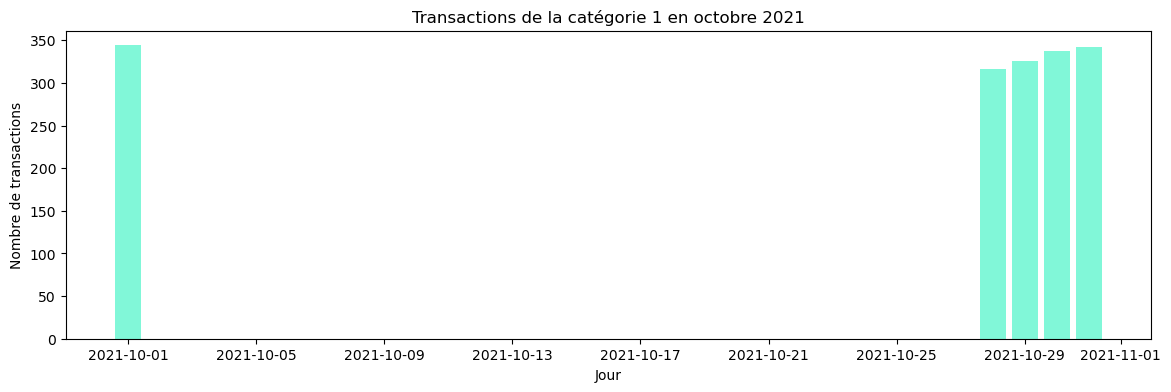

In [307]:
plt.bar(count_1.index, count_1.values, color = "#81F7D8")
plt.xlabel('Jour')
plt.ylabel('Nombre de transactions')
plt.title('Transactions de la catégorie 1 en octobre 2021')
plt.show()

In [308]:
oct_df_2 = oct_df[oct_df["categ"] == 2]
oct_df_2['day'] = oct_df_2['date'].dt.floor('D')
oct_df_2

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/138261013.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oct_df_2['day'] = oct_df_2['date'].dt.floor('D')


,date,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour,day
3526,2021-10-30 03:05:23.613165,2_101,s_112101,c_4958,m,1999,63.99,2,2021,10,3,Saturday,2021-10-30
3527,2021-10-08 22:14:56.120386,2_101,s_101993,c_4958,m,1999,63.99,2,2021,10,22,Friday,2021-10-08
3528,2021-10-11 15:31:30.568377,2_101,s_103293,c_4958,m,1999,63.99,2,2021,10,15,Monday,2021-10-11
3529,2021-10-01 20:28:40.100602,2_101,s_98589,c_520,f,1996,63.99,2,2021,10,20,Friday,2021-10-01
3530,2021-10-13 17:13:05.368356,2_101,s_104270,c_2009,m,1994,63.99,2,2021,10,17,Wednesday,2021-10-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21556,2021-10-15 00:57:49.639425,2_67,s_104872,c_815,m,1946,32.99,2,2021,10,0,Friday,2021-10-15
21564,2021-10-24 10:46:09.647533,2_198,s_109408,c_6,f,2004,138.32,2,2021,10,10,Sunday,2021-10-24
21565,2021-10-08 02:10:34.212812,2_198,s_101580,c_1946,m,1964,138.32,2,2021,10,2,Friday,2021-10-08
21573,2021-10-16 09:52:12.553406,2_50,s_105561,c_1907,m,1995,150.69,2,2021,10,9,Saturday,2021-10-16


In [309]:
count_2 = oct_df_2.groupby(oct_df_2['day'].dt.date).size()

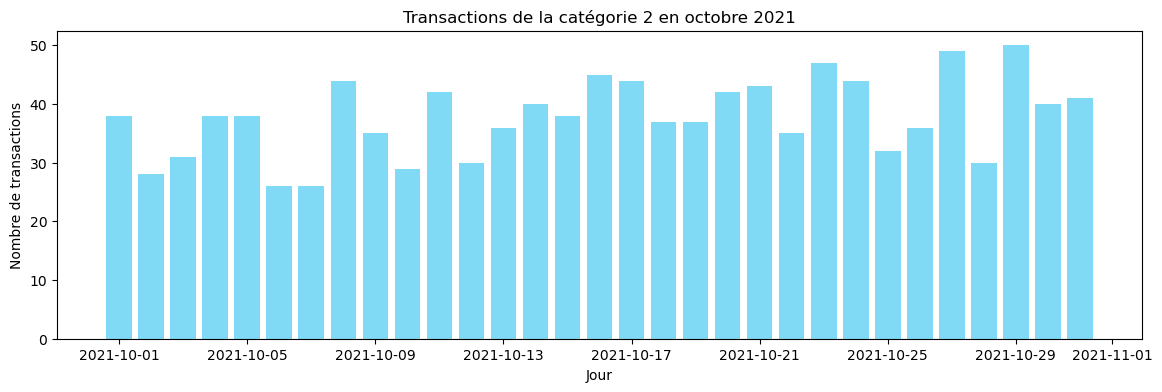

In [310]:
plt.bar(count_2.index, count_2.values, color = "#81DAF5")
plt.xlabel('Jour')
plt.ylabel('Nombre de transactions')
plt.title('Transactions de la catégorie 2 en octobre 2021')
plt.show()

#### Il n'y a pas eu de vente de la catégorie 1 entre le 1er et le 28 octobre 2021. Cela est probablement dû à une rupture de stock ou un problème lors de l'acquisition des données.

- Exclure les valeurs du mois d'octobre 2021 du dataset initial
- Calculer les proportions de CA pour chaque catégorie
- Afficher une représentation graphique des résultats en utilisant des barres et des camemberts

### Supression mois Octobre

In [311]:
ca_mensuel

,date,ca_mensuel
0,2021-03-31,482530.52
1,2021-04-30,476249.16
2,2021-05-31,493023.39
3,2021-06-30,484158.49
4,2021-07-31,482875.36
5,2021-08-31,482374.70
6,2021-09-30,507360.56
7,2021-10-31,320868.67
8,2021-11-30,516267.63
9,2021-12-31,525987.21


In [312]:
# supprimer Afficher le dataframe sans les valeurs du mois d'octobre 2021 
c_t_p_analyse = clt_transac_pdt[clt_transac_pdt.index.strftime('%Y-%m') != '2021-10']
c_t_p_analyse

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday
2022-05-30 01:17:07.487046,0_1518,s_216118,c_6714,f,1968,4.18,0,2022,5,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 06:52:02.225335,1_408,s_332548,c_7402,m,1945,35.24,1,2023,1,6,Thursday
2022-11-26 06:52:02.225335,1_408,s_302962,c_7402,m,1945,35.24,1,2022,11,6,Saturday
2021-09-26 06:52:02.225335,1_408,s_95708,c_7402,m,1945,35.24,1,2021,9,6,Sunday


In [313]:
ca_total = c_t_p_analyse.price.sum()
print("La chiffre d'affaires total, sans octobre 2021, est de: ", round(ca_total, 2), "euros." )

La chiffre d'affaires total, sans octobre 2021, est de:  11535067.8 euros.


In [314]:
nb_vente = c_t_p_analyse['session_id'].count()
print("Le total du nombre de vente, sans octobre 2021, est de: ", nb_vente )

Le total du nombre de vente, sans octobre 2021, est de:  657726


In [315]:
panier_moyen = round((ca_total/ nb_vente),2)
print("Le panier moyen, sans octobre 2021, est de: ", panier_moyen," euros.")

Le panier moyen, sans octobre 2021, est de:  17.54  euros.


## Nombre de vente par catégorie

In [316]:

nombre_vente = round(c_t_p_analyse.groupby('categ')['price'].agg(['count']))
nombre_vente.rename(columns ={"count": "nombre_vente"}, inplace= True)
nombre_vente.head()

,nombre_vente
categ,
0,396911
1,225503
2,35312


<function matplotlib.pyplot.show(close=None, block=None)>

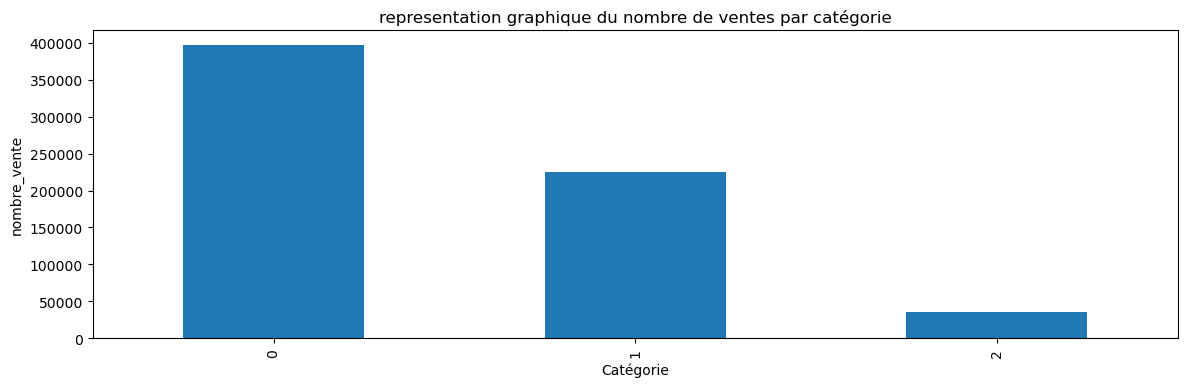

In [317]:
# representation graphique du nombre de ventes
fig_nombre_vente = nombre_vente['nombre_vente'].plot.bar()
plt.xlabel("Catégorie")
plt.ylabel("nombre_vente")
plt.title("representation graphique du nombre de ventes par catégorie")
plt.show

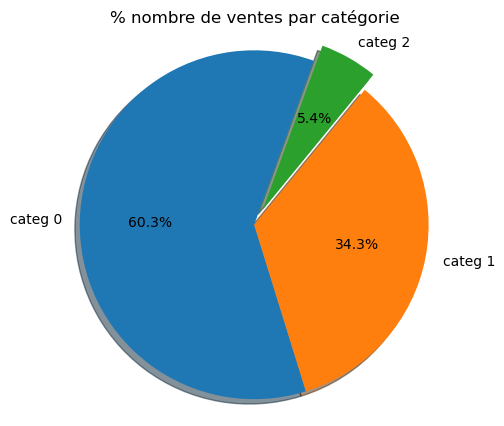

In [318]:
# Affichage du graphique (camembert) du nombre de ventes réalisé par catégorie
plt.figure(figsize = (5, 5))
explode = (0,0,0.1) # explode "Alimentation des touristes"
plt.pie(nombre_vente["nombre_vente"], explode = explode,labels = ["categ 0","categ 1","categ 2"],autopct = '%1.1f%%', shadow = True, startangle = 70)
plt.title('% nombre de ventes par catégorie')
plt.axis('equal')
plt.show()

## CA par catégorie


In [319]:
ca_cat = round(c_t_p_analyse.groupby('categ')['price'].agg(['sum']))
ca_cat.rename(columns ={"sum": "chiffre_affaire_p_categ"}, inplace= True)
ca_cat.head()

,chiffre_affaire_p_categ
categ,
0,4222618.0
1,4619960.0
2,2692489.0


<function matplotlib.pyplot.show(close=None, block=None)>

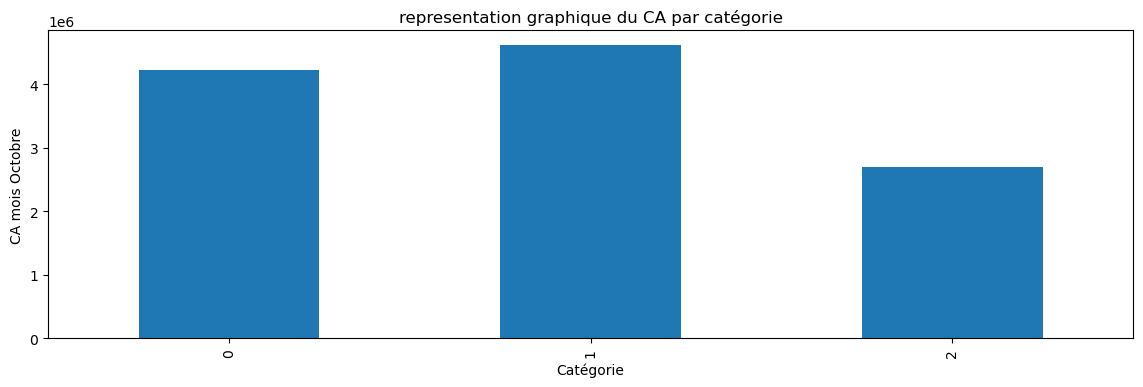

In [320]:
fig_ca_cat = ca_cat['chiffre_affaire_p_categ'].plot.bar()
plt.xlabel("Catégorie")
plt.ylabel("CA mois Octobre")
plt.title("representation graphique du CA par catégorie")
# fig_ca_p_categ.savefig("fig_z_score.png", bbox_inches = "tight")
fig_ca_cat
plt.show

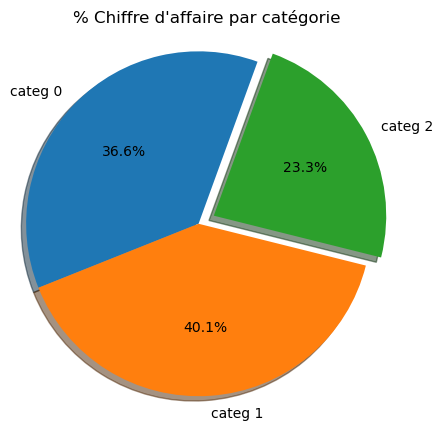

In [321]:
# Affichage du graphique (camembert) du chiffre d'affaire réalisé par catégorie
plt.figure(figsize = (5, 5))
explode = (0,0,0.1) # explode "Alimentation des touristes"
plt.pie(ca_cat["chiffre_affaire_p_categ"], explode = explode,labels = ["categ 0","categ 1","categ 2"],autopct = '%1.1f%%', shadow = True, startangle = 70)
plt.title('% Chiffre d\'affaire par catégorie')
plt.axis('equal')
plt.show()

#### La catégorie 1 a la plus grande part de la répartition du chiffre d'affaires avec 40,1%, suivie de la catégorie 0 avec 36,6% et enfin la catégorie 2 avec 23,3%.

## CA par genre

In [322]:
ca_genre = round(c_t_p_analyse.groupby('sex')['price'].agg(['sum']))
ca_genre.rename(columns ={"sum": "chiffre_affaire_p_sexe"}, inplace= True)
ca_genre.head()

,chiffre_affaire_p_sexe
sex,
f,5705514.0
m,5829554.0


<function matplotlib.pyplot.show(close=None, block=None)>

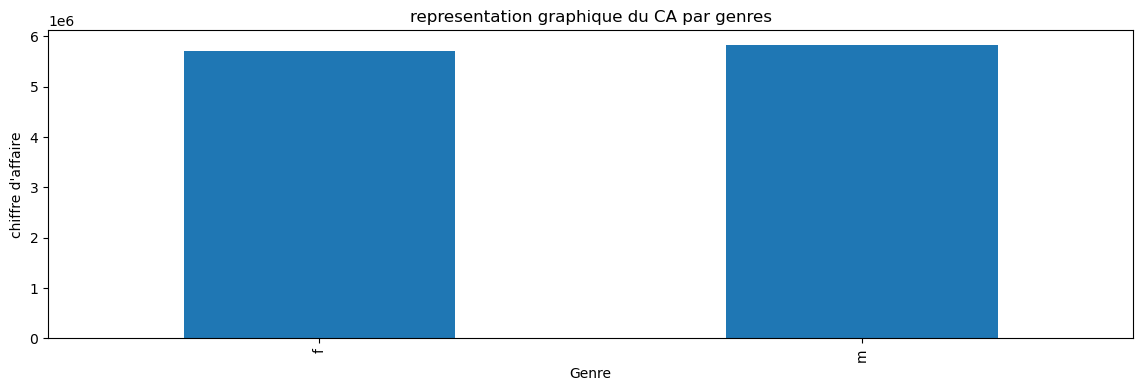

In [323]:
fig_ca_genre = ca_genre['chiffre_affaire_p_sexe'].plot.bar()
plt.xlabel("Genre")
plt.ylabel("chiffre d'affaire")
plt.title("representation graphique du CA par genres")
# fig_ca_p_categ.savefig("fig_z_score.png", bbox_inches = "tight")
fig_ca_cat
plt.show

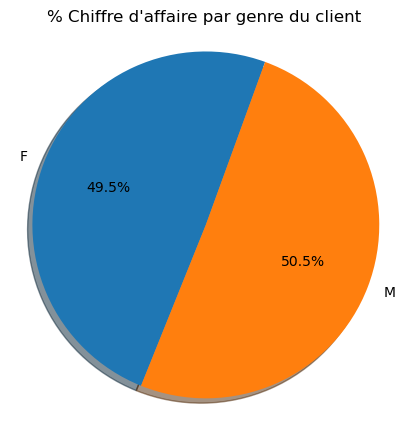

In [324]:
plt.figure(figsize = (5, 5))
explode = (0,0) # explode "Alimentation des touristes"
plt.pie(ca_genre["chiffre_affaire_p_sexe"], explode = explode,labels = ["F","M"],autopct = '%1.1f%%', shadow = True, startangle = 70)
plt.title('% Chiffre d\'affaire par genre du client')
plt.axis('equal')
plt.show()

####  Le chiffre d'affaires est réparti presque de manière identique entre les hommes et les femmes.

#### Répartition du chiffre d'affaire entre les femmes et les hommes par catégories de produits

In [325]:
# Méthode .pivot_table() (pour affiner davantage) la répartition des hommes et des femmes selon la catégorie d'achat
# Utilisation de df (étape suivante) obtenu par jointure avec df_customers et df_transactionsv1_products
f_h = round(c_t_p_analyse.groupby(['sex', 'categ'])['price'].agg(['sum']))
f_h.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
f_h['sex']=f_h.index
f_h


chiffre_affaire     sex
sex categ                         
f   0            2094236.0  (f, 0)
    1            2341981.0  (f, 1)
    2            1269296.0  (f, 2)
m   0            2128382.0  (m, 0)
    1            2277979.0  (m, 1)
    2            1423193.0  (m, 2)

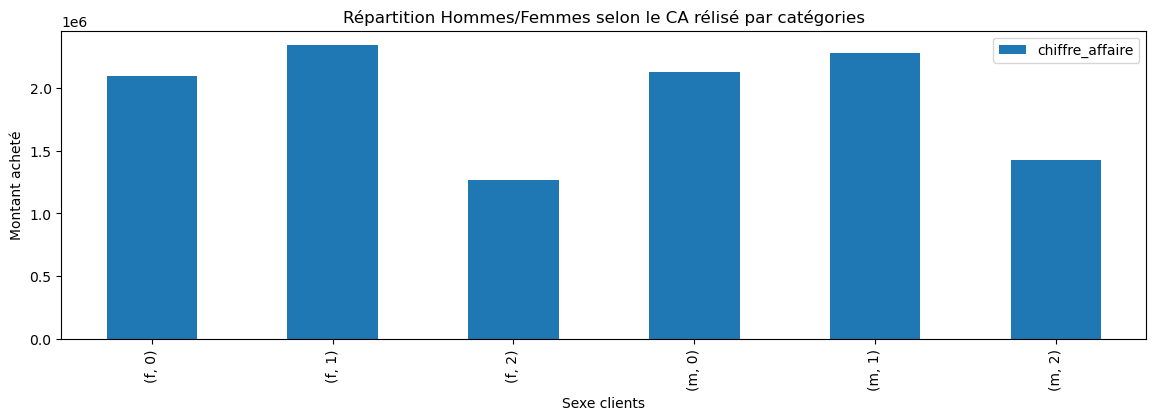

In [326]:
# fm = df.pivot_table(index='sex', columns='categ', values='price', aggfunc=sum).reset_index()

f_h.plot(kind='bar', x='sex')

plt.title('Répartition Hommes/Femmes selon le CA rélisé par catégories')
plt.xlabel('Sexe clients')
plt.ylabel('Montant acheté')

# plt.savefig("p4_graphic/sex_categ.png")
plt.show()

### Le genre n'a pas de conséquence sur le CA par catégorie de produits.

### Répartition du CA par client

In [327]:

# ca_client = df.groupby('client_id').agg({'price': 'sum'}).sort_values('price', ascending=False)
ca_client = c_t_p_analyse.groupby("client_id")["price"].agg(["sum"])
ca_client.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
ca_client.head(10)

,chiffre_affaire
client_id,
c_1,550.19
c_10,1353.60
c_100,254.85
c_1000,2209.92
c_1001,1720.08
c_1002,326.19
c_1003,1139.50
c_1004,971.84
c_1005,827.98


###  LISTE DES CLIENTS QUI ONT GENERES LE PLUS DE CHIFFRE D'AFFAIRE 


In [328]:
# afficher les 10 meilleurs clients en terme de chiffre d'affaire généré
top_10_clients = c_t_p_analyse.groupby("client_id")["price"].agg(["sum"])
top_10_clients.rename(columns ={"sum": "chiffre_affaire"}, inplace= True)
top_10_clients.sort_values(by= "chiffre_affaire" , ascending = False).head(10)

,chiffre_affaire
client_id,
c_1609,312755.08
c_4958,282654.61
c_6714,149843.69
c_3454,111796.68
c_2899,5214.05
c_1570,5136.14
c_3263,5129.89
c_7319,5120.55
c_8026,4979.40


In [329]:
top_10_clients

,chiffre_affaire
client_id,
c_1,550.19
c_10,1353.60
c_100,254.85
c_1000,2209.92
c_1001,1720.08
...,...
c_995,189.41
c_996,1611.59
c_997,1432.02


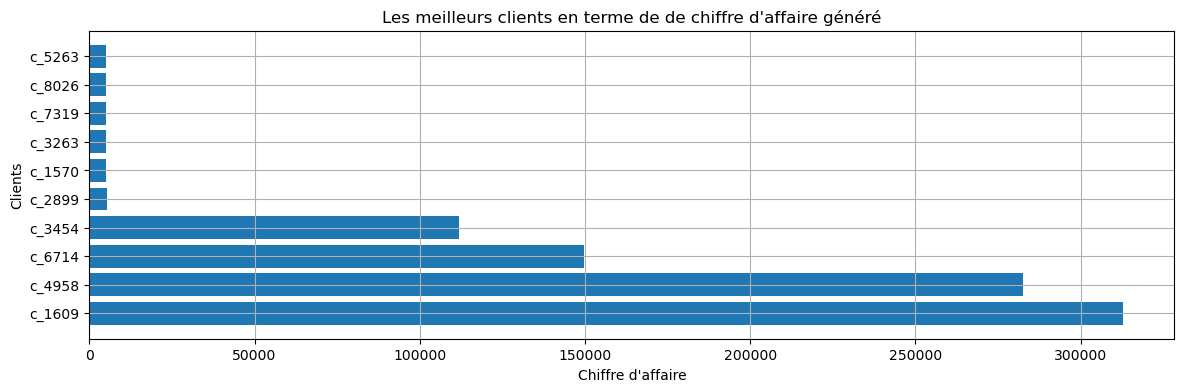

In [330]:
# générer un graphique barplot pour illutrer les 10 meilleurs clients
tp = top_10_clients.sort_values(by='chiffre_affaire' , ascending = False).head(10)
plt.figure(figsize = (14, 4))
height =tp.	chiffre_affaire
bars =  tp.index
y_pos = np.arange(len(bars))
 
# Create horizontal bars
plt.barh(y_pos, height)
 
# Create names on the x-axis
plt.yticks(y_pos, bars)
plt.grid()
plt.title("Les meilleurs clients en terme de de chiffre d\'affaire généré")
plt.xlabel('Chiffre d\'affaire')
plt.ylabel("Clients")
plt.show()

In [331]:
ca_4_clients = 100 * top_10_clients.head(4).chiffre_affaire.sum() / c_t_p_analyse.price.sum()
print ("Ces 4 gros clients apportent ", round(ca_4_clients,2), "% du CA total.")

Ces 4 gros clients apportent  0.04 % du CA total.


In [333]:
ca_4_clients = 100 * top_10_clients.sort_values(by= "chiffre_affaire" , ascending = False).head(10).chiffre_affaire.sum() / c_t_p_analyse.price.sum()
print ("Ces 4 gros clients apportent ", round(ca_4_clients,2), "% du CA total du top 10 clients.")

Ces 4 gros clients apportent  7.69 % du CA total du top 10 clients.


In [140]:
c_t_p_analyse.head(4)

,id_prod,session_id,client_id,sex,birth,price,categ,année,mois,heure,jour
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,1986,4.18,0,2022,5,13,Friday
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,1986,4.18,0,2021,7,13,Tuesday
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,1986,4.18,0,2022,8,13,Saturday
2021-05-09 11:52:55.100386,0_1518,s_32104,c_6714,f,1968,4.18,0,2021,5,11,Sunday


In [141]:
# Suppression des 4 clients
mask = c_t_p_analyse['client_id'].isin(['c_1609','c_4958','c_6714','c_3454'])
c_t_p_analyse = c_t_p_analyse.loc[~mask]

ca_client = c_t_p_analyse.groupby('client_id').agg({'price': 'sum'}).sort_values('price', ascending=False)
ca_client.head(10)

,price
client_id,
c_2899,5214.05
c_1570,5136.14
c_3263,5129.89
c_7319,5120.55
c_8026,4979.40
c_5263,4964.87
c_2140,4949.96
c_7421,4944.39
c_1422,4914.74


### Les produits qui se sont le mieux vendus

In [142]:
# Afficher les produits qui se sont le mieux vendus par nombre de commandes 
top_vente = c_t_p_analyse.groupby('id_prod')['price'].agg(['count'])
top_vente.rename(columns ={"count": "nombre_de_vente"}, inplace= True)
top_vente.sort_values(by = "nombre_de_vente", ascending = False).head(10)

,nombre_de_vente
id_prod,
1_369,2107
1_414,2035
1_417,2033
1_498,1960
1_425,1951
1_412,1842
1_413,1833
1_407,1806
1_406,1797


### Les produits qui se sont le moins bien vendus

In [143]:
# Afficher les produits qui se sont le mieux vendus par nombre de commandes 
top_flop = c_t_p_analyse.groupby('id_prod')['price'].agg(['count'])
top_flop.rename(columns ={"count": "nombre_de_vente"}, inplace= True)
top_flop.sort_values(by = "nombre_de_vente").head(10)

,nombre_de_vente
id_prod,
0_88,1
2_81,1
0_1728,1
2_23,1
0_1498,1
0_1683,1
0_980,1
0_1633,1
2_66,1


In [144]:
# Afficher les produits qui se sont vendus à moins de 50 exemplaires
pdt_sous_50_vente = top_vente[top_vente["nombre_de_vente"] < 50].count()


In [145]:
print("Le nombre de produit vendus à moins de 50 exemplaire est de", pdt_sous_50_vente.values[0])

Le nombre de produit vendus à moins de 50 exemplaire est de 1603


## REPARTITION DU CHIFFRE D'AFFAIRE ENTRE LES CLIENTS

### CA par client

In [146]:
ca_clt_repart = round(c_t_p_analyse.groupby('client_id')['price'].agg(['sum']))
ca_clt_repart.rename(columns ={"sum": "chiffre_affaire_client"}, inplace= True)
ca_clt_repart["%_ca_clt"] = (ca_clt_repart["chiffre_affaire_client"] / ca_clt_repart["chiffre_affaire_client"].sum()) * 100
ca_clt_repart

,chiffre_affaire_client,%_ca_clt
client_id,,
c_1,550.0,0.005151
c_10,1354.0,0.012680
c_100,255.0,0.002388
c_1000,2210.0,0.020697
c_1001,1720.0,0.016108
...,...,...
c_995,189.0,0.001770
c_996,1612.0,0.015096
c_997,1432.0,0.013411


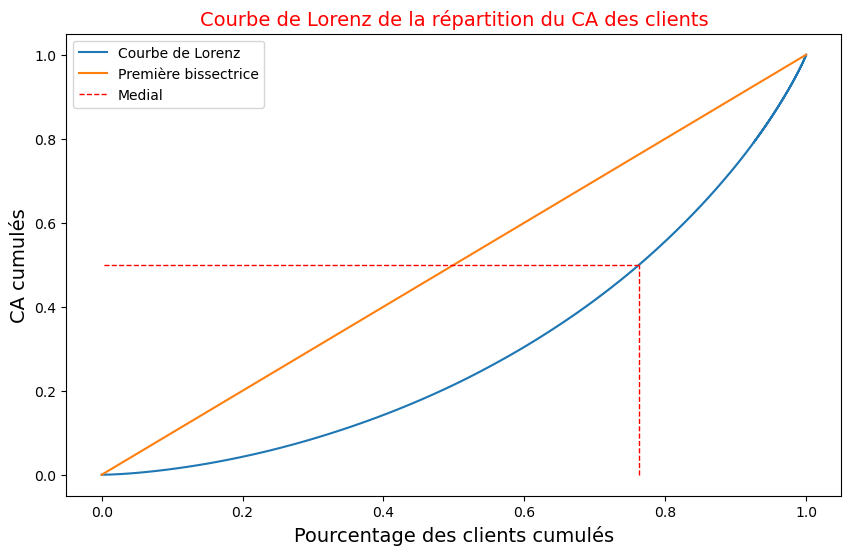

In [147]:
n_client = len(ca_clt_repart.index)
ca_c = ca_clt_repart.chiffre_affaire_client.values
lorenz = np.cumsum(np.sort(ca_c)) / ca_c.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0
medial = lorenz[(lorenz < 0.5)].size / lorenz.size # Calcul de l'intersection
xaxis = np.linspace(0-1/n_client,1+1/n_client,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.

plt.figure(figsize =(10,6))
plt.plot(xaxis,lorenz,drawstyle='steps-post',label = 'Courbe de Lorenz')
plt.plot([0,1], [0,1], label = 'Première bissectrice') #tracer la bisséctrice

plt.vlines(medial, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1,label='Medial')
plt.hlines(xmin=medial, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz de la répartition du CA des clients',fontsize = 14, color = 'red')
plt.xlabel('Pourcentage des clients cumulés', fontsize=14)
plt.ylabel('CA cumulés', fontsize=14) 
plt.legend(loc='upper left', fontsize=10)

In [148]:
# définir la fonction pour calculer le coefficient de Gini
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [149]:
gini(ca_clt_repart["chiffre_affaire_client"])

0.40373284154172634


- Indice de gini : 0.40


- indice de gini moyen
- 50% du chiffre d'affaire est réalisé par 77% des clients alors que 23% des clients réalise les 50% du ca restants




En conclusion, Seulement 23% des clients ont généré 50% du chiffre d'affaires, ce qui signifie que la répartition du montant du CA n'est pas uniforme entre les client

## ANALYSE DES CORRELATIONS

### LIEN ENTRE LE GENRE DU CLIENT ET LA CATEGORIE DE LIVRES ACHETES

##### Rechercher une éventuelle association entre ces 2 variables en utilisant le test  CHI 2

Pour cela émettons les 2 hypothèse du test:

- Hypothèse nulle H0 : il n'existe pas d'association entre la variable sex et la variable catégorie de produit ==> ces 2 variables sont indépendantes
- Hypohtèse H1 : il existe une association entre la variable âge et la variable catégorie de produit ==> ces 2 variables sont dépendantes
- Degré de liberté calculé = 2
- Valeur critique du chi 2 observé est calculé haut dela de laquelle l'hypothèse nulle H0 sera rejeter : une valeur de chi 2 seuil corespondant à une erreur strandard de α = 5% avec un degrès de liberté de 2 donc chi2 seuil = 5.99

In [150]:
# Tableau de contingence (resultats observés) des 2 variables 'sex' et 'catégorie'. Génération
gener_cat = c_t_p_analyse.pivot_table( index= 'sex', columns = 'categ', values='price', aggfunc = len,margins=True, margins_name="Total").fillna(0)
gener_cat.head()

categ,0,1,2,Total
sex,,,,
f,192025,110550,16429,319004
m,178044,100227,15351,293622
Total,370069,210777,31780,612626


In [151]:
# Tableau de contingence (résultats observés) sans les totaux. Génération
gener = c_t_p_analyse.pivot_table( index= 'sex', columns = 'categ', values='price', aggfunc = len).fillna(0)
gener.head()

categ,0,1,2
sex,,,
f,192025,110550,16429
m,178044,100227,15351


In [152]:
# Afficher les valeurs de : chi2 observé, p-value, degré de liberté, les resultas attendus
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(gener)
print('chi2 observé :', st_chi2,'\np-value :',st_p,'\ndegré de liberté :',st_dof,'\nresultas attendus :',st_exp)

chi2 observé : 18.75788251563821 
p-value : 8.448460261159054e-05 
degré de liberté : 2 
resultas attendus : [[192700.75262232 109754.90120889  16548.34616879]
 [177368.24737768 101022.09879111  15231.65383121]]


In [153]:
# comparaison de la p-value à la valeur d'erreur standard
st_p < 0.05

True

##### Resultat

- chi2 seuil = 5.99  (###########voir tableau#######)
- p-value extrêmement petite < α = 5% 
- chi2 observé = 18.74 largement superieur au chi2 seuil

##### Conclusion

- La valeur de p-value obtenue est inferieur à la valeur d'erreur standard de 5%
- Le chi2 observé est largement supérieur au khi2 seuil, on peut par conséquent rejeter l'hypothèse H0
- On peut conclure qu'il y'a bien une association (dépendance) entre la variable sexe et la catégorie des produits achetés


### LIEN ENTRE L'AGE DES CLIENTS ET LE MONTANT TOTAL DES ACHATS



- Création d'une colonne âge.
- Création d'un dataset en filtrant par âge et aggrégation en appliquant la somme de la variable price. 

- Test de Shapiro-Wilk pour déterminer si une variable continue suit une distribution normale ou non
- H0 : la distribution de l'échantillon suit une loi normale
- H1 : la distribution de l'échantillon ne suit pas une loi normale

- Calculer également le coefficient de spearman pour vérifier une éventuelle corrélation entre le genre du client et la catégorie des livres achetés.
- H0 : il n'y a pas de corrélation entre l'âge des clients et le montant total des achats
- H1 : il y a une corrélation entre l'âge des clients et le montant total des achats

- Vérification graphique d'une éventuelle corrélation entre la variable genre du client et la catégorie des livres achetés.

In [154]:
c_t_p_analyse.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 612626 entries, 2022-05-20 13:21:29.043970 to 2021-03-08 21:10:32.250919
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id_prod     612626 non-null  object  
 1   session_id  612626 non-null  object  
 2   client_id   612626 non-null  object  
 3   sex         612626 non-null  object  
 4   birth       612626 non-null  category
 5   price       612626 non-null  float64 
 6   categ       612626 non-null  category
 7   année       612626 non-null  int64   
 8   mois        612626 non-null  int64   
 9   heure       612626 non-null  int64   
 10  jour        612626 non-null  object  
dtypes: category(2), float64(1), int64(3), object(5)
memory usage: 47.9+ MB


In [155]:
# changer "birth" en type int
c_t_p_analyse["birth"] = c_t_p_analyse["birth"].astype("int")

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/1413945047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_t_p_analyse["birth"] = c_t_p_analyse["birth"].astype("int")


In [156]:
c_t_p_analyse['age'] = 2023 - c_t_p_analyse['birth']
c_t_p_analyse = c_t_p_analyse.drop(columns='birth')
c_t_p_analyse

/var/folders/pz/zclnfs_n153fb092fvchqv380000gn/T/ipykernel_23174/454149714.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_t_p_analyse['age'] = 2023 - c_t_p_analyse['birth']


,id_prod,session_id,client_id,sex,price,categ,année,mois,heure,jour,age
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,4.18,0,2022,5,13,Friday,37
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,4.18,0,2021,7,13,Tuesday,37
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,4.18,0,2022,8,13,Saturday,37
2022-05-27 12:41:28.779302,0_1518,s_214775,c_7456,f,4.18,0,2022,5,12,Friday,38
2021-11-27 12:41:28.779302,0_1518,s_125853,c_7456,f,4.18,0,2021,11,12,Saturday,38
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-26 06:52:02.225335,1_408,s_332548,c_7402,m,35.24,1,2023,1,6,Thursday,78
2022-11-26 06:52:02.225335,1_408,s_302962,c_7402,m,35.24,1,2022,11,6,Saturday,78
2021-09-26 06:52:02.225335,1_408,s_95708,c_7402,m,35.24,1,2021,9,6,Sunday,78


In [157]:
c_t_p_analyse.isnull().sum()

id_prod       0
session_id    0
client_id     0
sex           0
price         0
categ         0
année         0
mois          0
heure         0
jour          0
age           0
dtype: int64

In [158]:
age_ca = c_t_p_analyse.groupby('age')['price'].agg(['sum'])
age_ca.rename(columns = {"sum": "montant_achat"}, inplace= True)
age_ca['age'] = age_ca.index
age_ca

,montant_achat,age
age,,
19,591414.23,19
20,172831.75,20
21,178797.16,21
22,174347.66,22
23,160575.19,23
...,...,...
90,5088.97,90
91,4803.64,91
92,2691.19,92


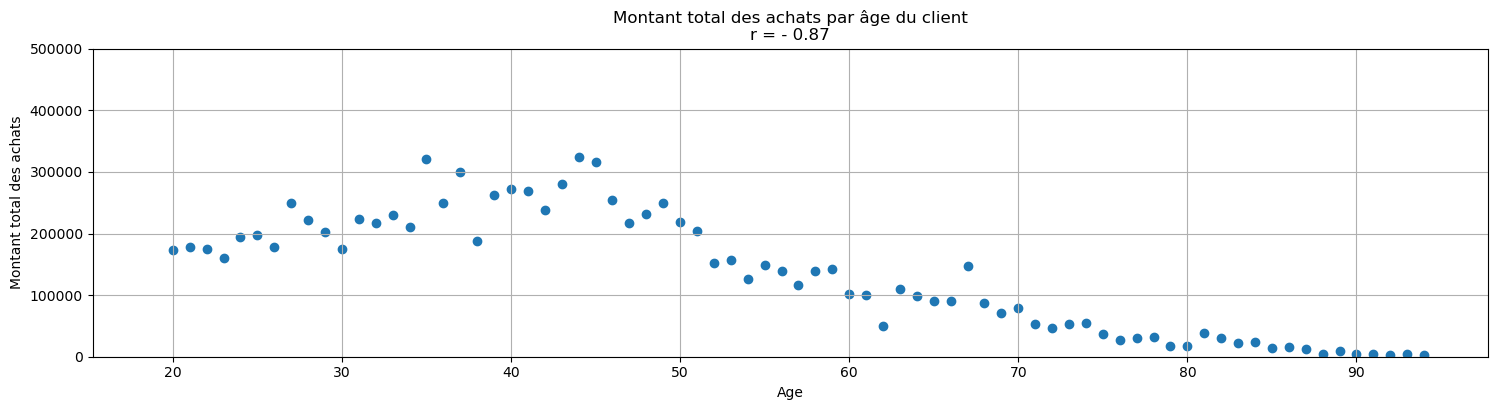

In [159]:
# Afficher un graphique du chiffre d'affaire en fonction du prix produit
plt.figure(figsize = (18, 4))
plt.scatter(age_ca['age'],age_ca['montant_achat'])
plt.ylim(0, 500000)
plt.title("Montant total des achats par âge du client\nr = - 0.87")
plt.xlabel('Age')
plt.ylabel("Montant total des achats")
plt.grid()
plt.show()

<AxesSubplot:>

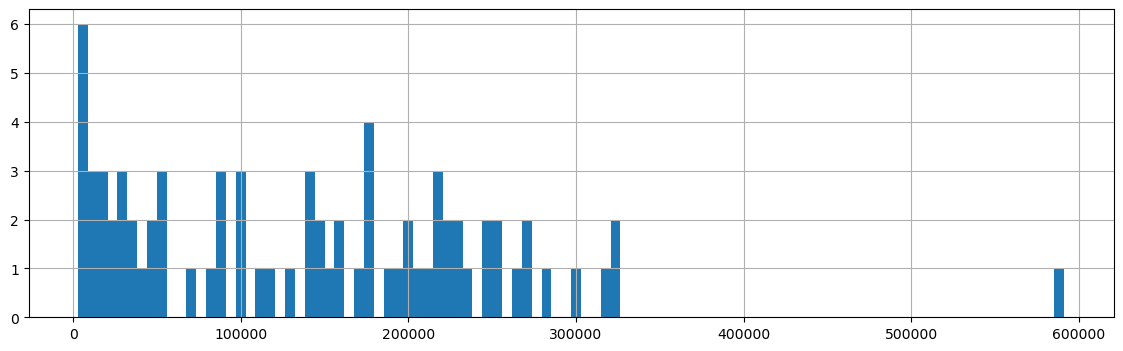

In [160]:
age_ca["montant_achat"].hist(bins = 100)

In [161]:
st.shapiro(age_ca["montant_achat"])

ShapiroResult(statistic=0.9120172262191772, pvalue=6.226655386853963e-05)

<AxesSubplot:>

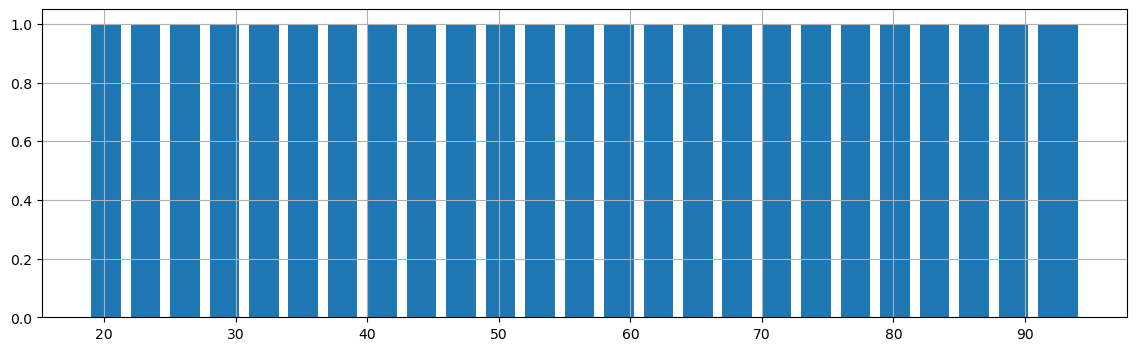

In [162]:
age_ca["age"].hist(bins = 100)

In [163]:
st.shapiro(age_ca["age"])

ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)

Etant donné que les tests effectués montrent que les distributions ne sont pas normales donc on réalise le test spearman

In [164]:
# Calculer le coéfficient de Spearman
age_ca['montant_achat'].corr(age_ca['age'],method='spearman')

-0.8740396445659603


- Le coefficient de Spearman = -0.87
- Le graphique de dispersion indique une relation liniaire entre ces 2 variables



En conclusion, les 2 variables étudiées indiquent une forte corrélation négative, à savoir le montant total des achats diminue avec l'augmentation de l'âge avec une tendance linéaire.

### LIEN ENTRE L'AGE DES CLIENTS ET LA FREQUENCE D'ACHAT



- Création d'un dataset fréquence d'achat par âge du client 

- Test de Shapiro-Wilk pour déterminer si une variable continue suit une distribution normale ou non
- H0 (hypothèse nulle) : la distribution de l'échantillon de la variable "fréquence d'achat" ou "âge" suit une distribution normale.
- H1 (hypothèse alternative) : la distribution de l'échantillon de la variable "fréquence d'achat" ou "âge" ne suit pas une distribution normale.

- Calculer également le coefficient de spearman  pour vérifier une éventuelle corrélation entre l'âge des clients et la fréquence d'achat.
- H0 (hypothèse nulle) : il n'y a pas de corrélation significative entre l'âge des clients et leur fréquence d'achat.
- H1 (hypothèse alternative) : il y a une corrélation significative entre l'âge des clients et leur fréquence d'achat.

- Vérification graphique d'une éventuelle corrélation entre la variable âge et la fréquence des achats.

In [165]:
age_freq = c_t_p_analyse.groupby('age')[['session_id']].count() / c_t_p_analyse['session_id'].count()
age_freq.rename(columns ={"session_id": "fréquence_achat"}, inplace = True)
age_freq['age'] = age_freq.index
age_freq.head()

,fréquence_achat,age
age,,
19,0.024108,19
20,0.006918,20
21,0.007293,21
22,0.006792,22
23,0.007017,23


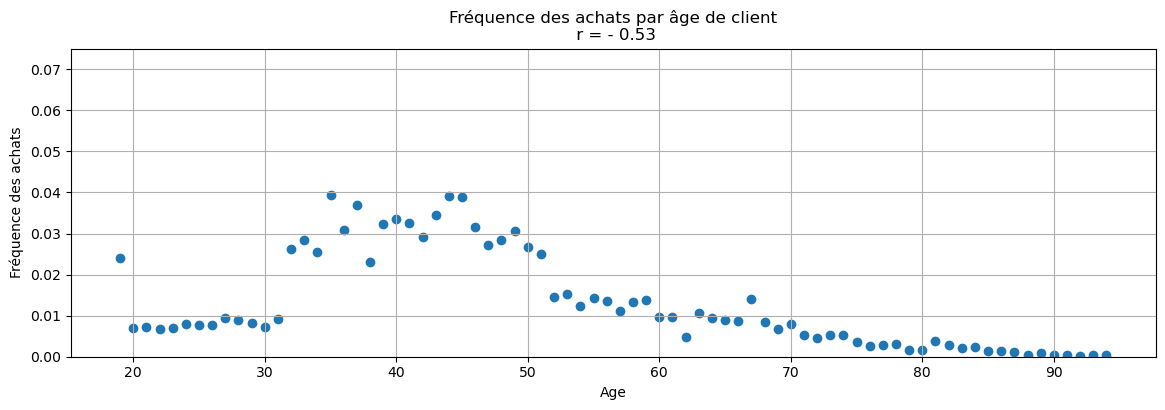

In [166]:
# Graphique de dispersion de la fréquence des achats par âge de client
plt.figure(figsize = (14, 4))
plt.scatter(age_freq['age'],age_freq['fréquence_achat'])
plt.ylim(0, 0.075)
plt.title("Fréquence des achats par âge de client\n r = - 0.53")
plt.xlabel('Age')
plt.ylabel("Fréquence des achats")
plt.grid()
plt.show()

<AxesSubplot:>

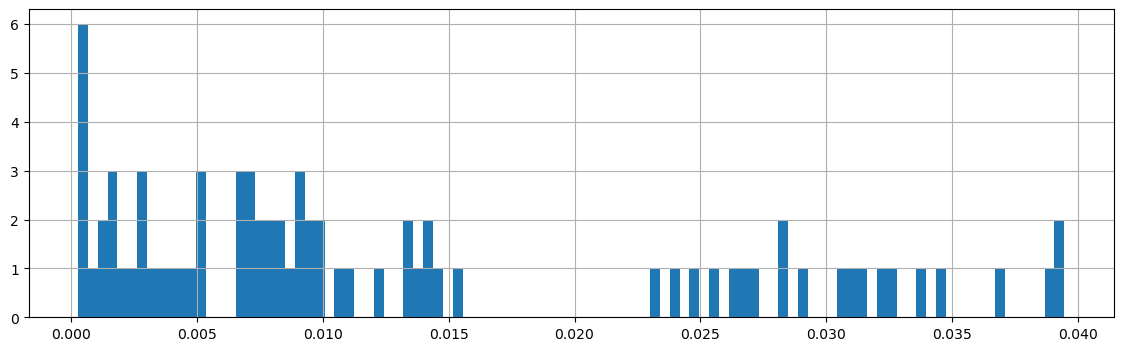

In [167]:
age_freq["fréquence_achat"].hist(bins = 100)

In [168]:
st.shapiro(age_freq["fréquence_achat"])

ShapiroResult(statistic=0.859683096408844, pvalue=5.964925549051259e-07)

<AxesSubplot:>

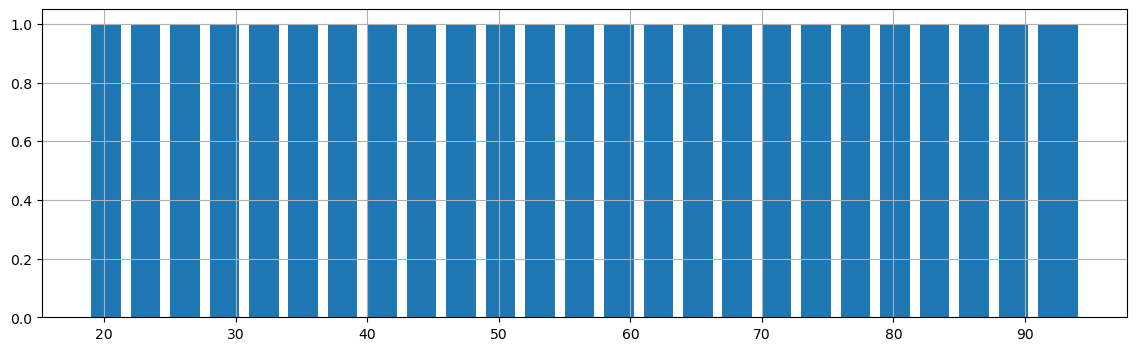

In [169]:
age_freq["age"].hist(bins = 100)

In [170]:
st.shapiro(age_freq["age"])

ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)

Etant donné que les tests effectués montrent que les distributions ne sont pas normales donc on réalise le test spearman

In [171]:
# Coefficient de Spearman
age_freq['fréquence_achat'].corr(age_freq['age'],method='spearman')

-0.6737935748462065

Le coefficient de Spearman étant à -0,67, il indique une corrélation négative modérée entre les deux variables étudiées. Cela signifie que lorsque l'âge augmente, la fréquence d'achat a tendance à diminuer, et vice versa.

### LIEN ENTRE L'AGE DES CLIENTS ET LA TAILLE DU PANIER MOYEN

- Création d'un dataframe en filtrant par âge et aggrégation en appliquant la moyenne de la variable price. 

- Test de Shapiro-Wilk pour déterminer si une variable continue suit une distribution normale ou non
- H0 : la distribution de l'âge des clients et la taille du panier moyen suivent une distribution normale

- H1 : au moins une des deux variables ne suit pas une distribution normale

- Calculer également le coefficient de spearman  pour vérifier une éventuelle corrélation entre l'âge des clients et la taille du panier moyen.
- H0 : il n'y a pas de corrélation entre l'âge des clients et la taille du panier moyen

- H1 : il y a une corrélation significative entre l'âge des clients et la taille du panier moyen


- Vérification graphique d'une éventuelle corrélation entre la variable âge et la taille du panier moyen.

In [172]:
c_t_p_analyse.head()

,id_prod,session_id,client_id,sex,price,categ,année,mois,heure,jour,age
date,,,,,,,,,,,
2022-05-20 13:21:29.043970,0_1518,s_211425,c_103,f,4.18,0,2022,5,13,Friday,37
2021-07-20 13:21:29.043970,0_1518,s_64849,c_103,f,4.18,0,2021,7,13,Tuesday,37
2022-08-20 13:21:29.043970,0_1518,s_255965,c_103,f,4.18,0,2022,8,13,Saturday,37
2022-05-27 12:41:28.779302,0_1518,s_214775,c_7456,f,4.18,0,2022,5,12,Friday,38
2021-11-27 12:41:28.779302,0_1518,s_125853,c_7456,f,4.18,0,2021,11,12,Saturday,38


In [173]:
age_pan_mean = c_t_p_analyse.groupby(['client_id', 'age'])[['price']].count().groupby(level="age").mean()
age_pan_mean.rename(columns ={"price": "panier_moyen"}, inplace= True)
age_pan_mean['age']=age_pan_mean.index
age_pan_mean.head()

,panier_moyen,age
age,,
19,33.796339,19
20,29.227586,20
21,30.813793,21
22,33.288000,22
23,31.610294,23


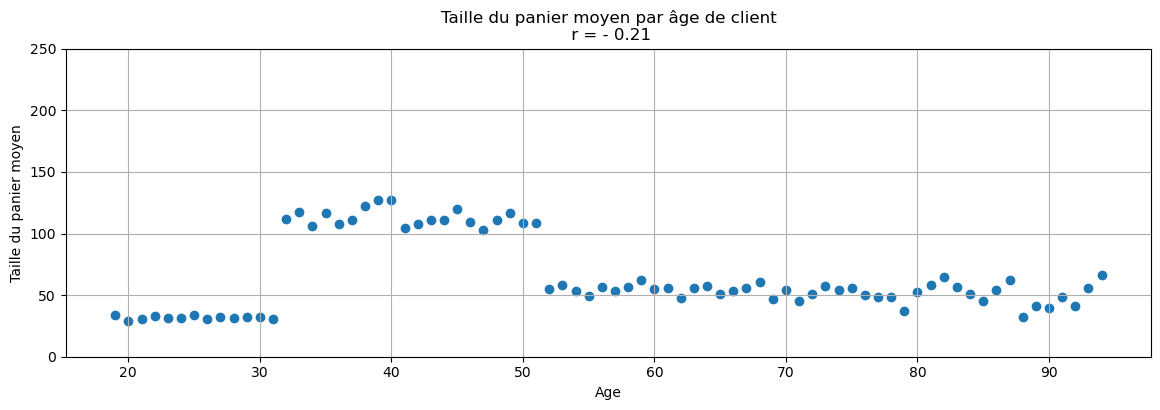

In [174]:
# Graphique de dispersion de la fréquence des achats par âge de client
plt.figure(figsize = (14, 4))
plt.scatter(age_pan_mean['age'],age_pan_mean['panier_moyen'])
plt.ylim(0, 250)
plt.title("Taille du panier moyen par âge de client\n r = - 0.21")
plt.xlabel('Age')
plt.ylabel("Taille du panier moyen")
plt.grid()
plt.show()

<AxesSubplot:>

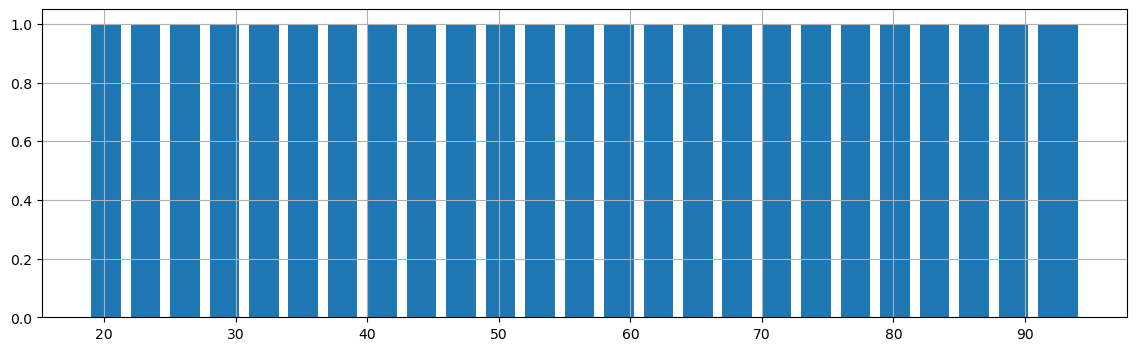

In [175]:
age_pan_mean["age"].hist(bins = 100)

In [176]:
st.shapiro(age_pan_mean["age"])

ShapiroResult(statistic=0.9549236297607422, pvalue=0.008753503672778606)

la valeur p est très faible, ce qui suggère que les données ne suivent pas une distribution normale. On peut donc conclure que la variable age n'est probablement pas normalement distribuée.

<AxesSubplot:>

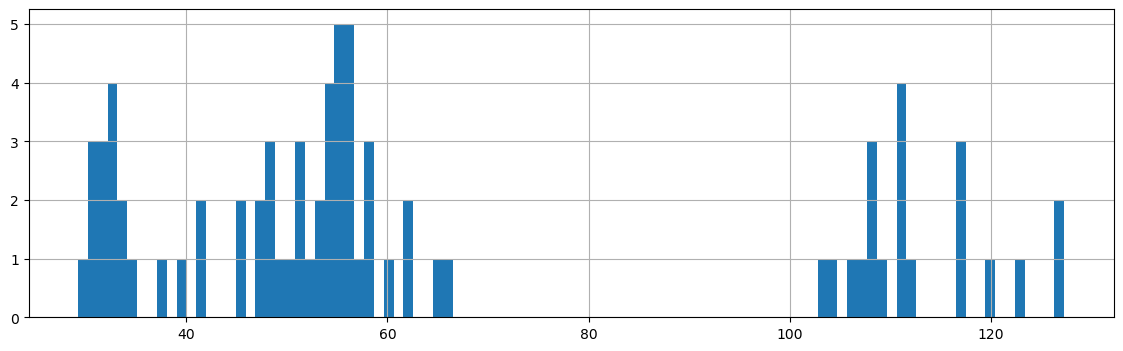

In [177]:
age_pan_mean["panier_moyen"].hist(bins = 100)

In [178]:
st.shapiro(age_pan_mean["panier_moyen"])

ShapiroResult(statistic=0.82671719789505, pvalue=5.2504518066598393e-08)

la valeur p est très faible, ce qui suggère que les données ne suivent pas une distribution normale. On peut donc conclure que la variable panier_moyen n'est probablement pas normalement distribuée.

In [179]:
# Coefficient de Spearman
age_pan_mean['panier_moyen'].corr(age_freq['age'],method='spearman')

-0.0015584415584415584

le coefficient de Spearman est très proche de zéro, ce qui suggère qu'il n'y a pas de corrélation significative entre les deux variables étudiées

### LIEN ENTRE L'AGE DES CLIENTS ET  LA CATEGORIE DES LIVRES ACHETES

- Analyse graphique : la forme des distributions, les moyennes
- Création d'un dataset âge des clients et catégorie des livres achetés 

- Test de Shapiro-Wilk et Leneve pour déterminer si les données sont normalement distribuées et si les variances des différents groupes sont homogènes.
Les hypothèses pour le test de Shapiro-Wilk sont les suivantes :
- H0 (hypothèse nulle) : les données suivent une distribution normale
- H1 (hypothèse alternative) : les données ne suivent pas une distribution normale

Les hypothèses pour le test de Levene sont les suivantes :
- H0 : les variances des échantillons sont égales
- H1 : au moins une des variances des échantillons est différente des autres


- Test de Kruskal-Wallis pour déterminer s'il y a une différence significative entre les distributions des 3 groupes.
Les hypothèses pour le test de Kruskal-Wallis sont les suivantes :
- H0 : les échantillons proviennent d'une population ayant la même distribution
- H1 : au moins un échantillon provient d'une population ayant une distribution différente des autres

- Vérification graphique d'une éventuelle corrélation entre la variable âge et la fréquence des achats.

In [180]:
# La fonction crosstab de la bibliothèque pandas de Python est utilisée pour créer une table de contingence 
# à partir de deux variables. Cette fonction permet de résumer les fréquences de chaque modalité de deux variables 
# croisées, c'est-à-dire de calculer le nombre d'occurrences de chaque combinaison de modalités.
distrib = pd.crosstab(c_t_p_analyse["age"], c_t_p_analyse["categ"], rownames = None, colnames=None, margins=False, normalize=False)
distrib 

categ,0,1,2
age,,,
19,3283,5671,5815
20,850,1662,1726
21,970,1716,1782
22,941,1544,1676
23,1053,1616,1630
...,...,...,...
90,137,177,1
91,116,175,2
92,73,89,2


In [181]:
# Moyenne d'age pour chaque catégorie
c_t_p_analyse.groupby('categ')['age'].agg(['mean'])

,mean
categ,
0,44.799700
1,48.802379
2,26.960824


<Figure size 900x600 with 0 Axes>

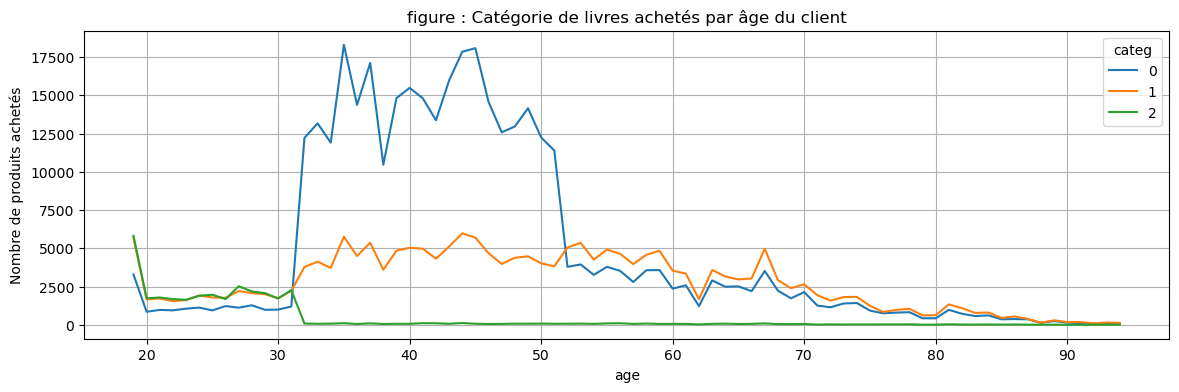

In [182]:
plt.figure(figsize = (9, 6))
distrib.plot()
plt.title('figure : Catégorie de livres achetés par âge du client')
plt.ylabel('Nombre de produits achetés')
plt.grid()
plt.show()

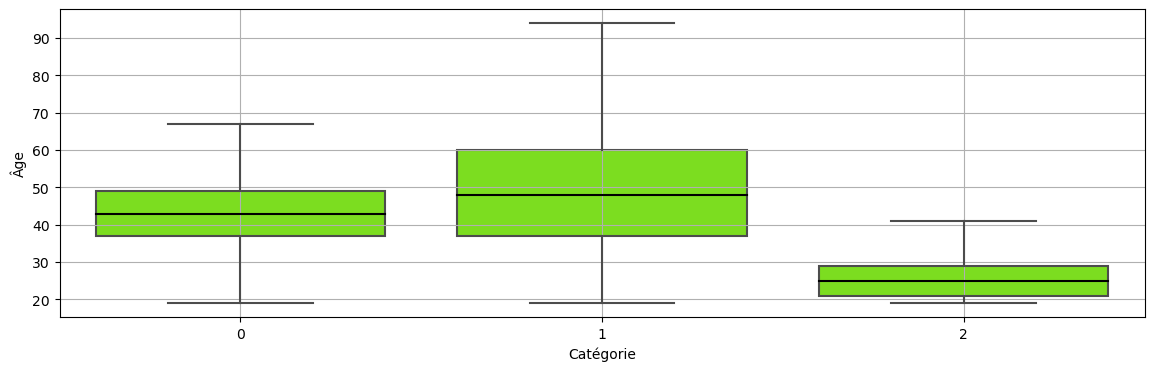

In [183]:
# Définition des variables X et Y
X = 'categ'
Y = 'age'

# Chargement des données dans un DataFrame
# analyse = pd.read_csv('mon_fichier.csv')

# Création du diagramme en boîte avec Seaborn
sns.boxplot(data = c_t_p_analyse, x=X, y=Y, showfliers=False, color='lawngreen', meanprops={"marker":"o", "markeredgecolor":"black", "markerfacecolor":"white"}, medianprops={"color":"black"})

# Définition des axes et de la grille
plt.xlabel('Catégorie')
plt.ylabel('Âge')
plt.grid()

# Affichage du graphique
plt.show()


In [184]:
cat0 = c_t_p_analyse["age"][c_t_p_analyse["categ"]==0]
cat1 = c_t_p_analyse["age"][c_t_p_analyse["categ"]==1]
cat2 = c_t_p_analyse["age"][c_t_p_analyse["categ"]==2]

In [185]:
# vérifier l'asymétrie de la distribution de la variable âge pour la catégorie 0
cat0.skew()

1.0121430664898412

<AxesSubplot:xlabel='age', ylabel='Count'>

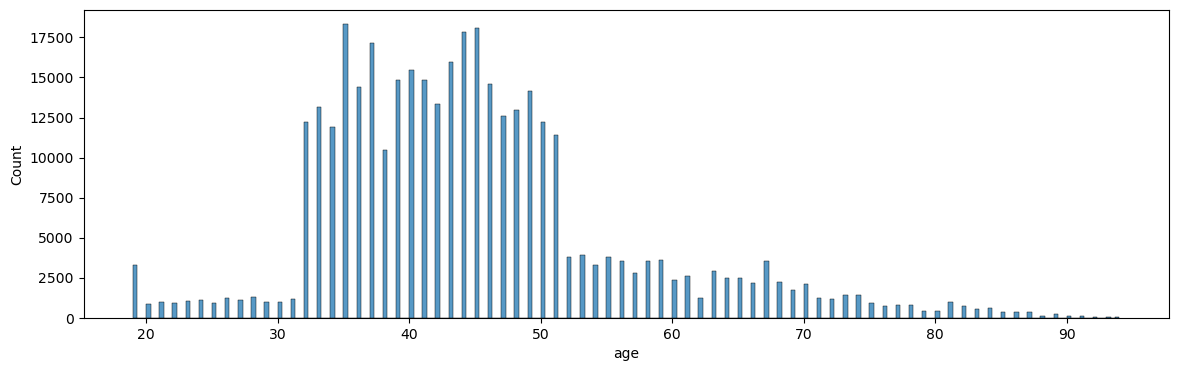

In [186]:
# Visualisation
fig_cat0 = sns.histplot(data = cat0)
fig_cat0

In [187]:
cat1.skew()

0.1925027293062763

<AxesSubplot:xlabel='age', ylabel='Count'>

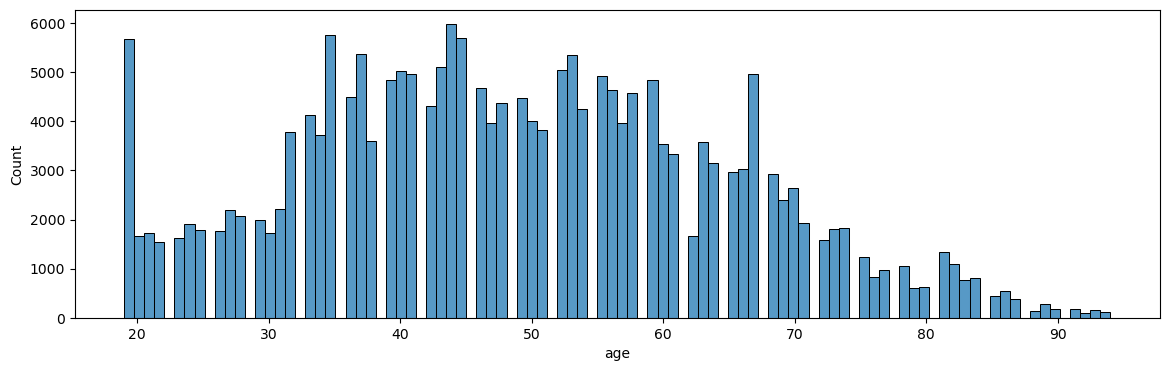

In [188]:
# Visualisation
fig_cat1 = sns.histplot(data = cat1)
fig_cat1

In [189]:
cat2.skew()

2.926386372284452

<AxesSubplot:xlabel='age', ylabel='Count'>

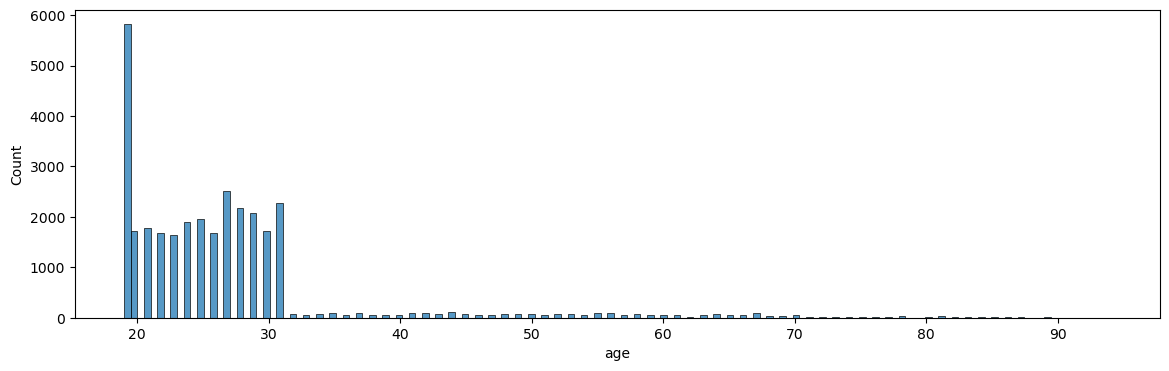

In [190]:
# Visualisation
fig_cat2 = sns.histplot(data = cat2)
fig_cat2

In [191]:
from scipy.stats import shapiro, levene


# test de normalité avec le test de Shapiro-Wilk
stat1, p1 = shapiro(cat0)
stat2, p2 = shapiro(cat1)
stat3, p3 = shapiro(cat2)

# test d'égalité des variances avec le test de Levene
stat, p = levene(cat0, cat1, cat2)

# afficher les résultats
print("Test de Shapiro-Wilk pour group1: statistique=%.3f, p=%.3f" % (stat1, p1))
print("Test de Shapiro-Wilk pour group2: statistique=%.3f, p=%.3f" % (stat2, p2))
print("Test de Shapiro-Wilk pour group3: statistique=%.3f, p=%.3f" % (stat3, p3))
print("Test de Levene: statistique=%.3f, p=%.3f" % (stat, p))


Test de Shapiro-Wilk pour group1: statistique=0.934, p=0.000
Test de Shapiro-Wilk pour group2: statistique=0.989, p=0.000
Test de Shapiro-Wilk pour group3: statistique=0.674, p=0.000
Test de Levene: statistique=23352.540, p=0.000


/Users/invite/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Les tests de Shapiro-Wilk pour les trois groupes montrent des p-values très faibles (inférieures à 0,05), ce qui suggère que l'hypothèse nulle de normalité ne peut pas être rejetée pour les données de ces groupes. Cela indique que les données de ces groupes sont susceptibles de suivre une distribution normale.

Le test de Levene donne une p-value très faible (inférieure à 0,05), ce qui suggère que l'hypothèse nulle de variances égales ne peut pas être acceptée pour les données des groupes. Cela peut indiquer une différence significative dans les variances des données des différents groupes.

In [192]:
from scipy.stats import kruskal

# effectuer le test de Kruskal-Wallis
stat, p = kruskal(cat0, cat1, cat2)

# afficher les résultats
print("Statistique de test=%.3f, p=%.3f" % (stat, p))


Statistique de test=69911.214, p=0.000


Les distributions des groupes "age catégorie de livres achetés" ne sont pas égales, il y a une différence significative entre au moins deux groupes.

## Conclusion

Après analyse, plusieurs constatations ont été faites :

- 21 clients sont totalement inactifs et 21 produits n'ont jamais été commandés.

- Le produit 0_2245, qui a été commandé 221 fois, ne présente pas de référence de prix et nécessite une investigation.

- Le chiffre d'affaires total est de 11 853 728 €.

- En octobre 2021, le chiffre d'affaires mensuel était anormalement bas, probablement en raison d'une rupture de stocks des produits de la catégorie 1.

- Bien que la catégorie 1 soit en tête en termes de chiffre d'affaires par catégorie de produits, elle est en deuxième position en termes de nombre de ventes, derrière la catégorie 0.

- La répartition du chiffre d'affaires est presque égale entre les hommes et les femmes, et cette tendance est également observée pour chaque catégorie de produits.

- Les produits de la catégorie 1 sont les mieux vendus et ceux de la catégorie 0 sont les moins vendus.

- 21% des clients ont généré 50% du chiffre d'affaires, ce qui indique une répartition inégalitaire du chiffre d'affaires entre les clients.

- En se basant sur les résultats de l'analyse, on peut en déduire que le genre des clients est un facteur important dans le choix de la catégorie de livres achetés. Cela peut suggérer que les livres sont souvent associés à des stéréotypes de genre, ou que les intérêts personnels varient en fonction du genre.

- En ce qui concerne l'âge des clients, les résultats indiquent que les préférences d'achat évoluent avec l'âge. Les clients plus jeunes ont tendance à dépenser plus et à acheter plus fréquemment, tandis que les clients plus âgés ont tendance à dépenser moins et à acheter moins souvent. Cela peut être dû à des changements dans les priorités ou les intérêts au fil du temps.

- En ce qui concerne la taille du panier moyen, il n'y a pas de corrélation significative avec l'âge des clients, ce qui peut indiquer que la taille du panier dépend de facteurs autres que l'âge, tels que les intérêts personnels ou les habitudes d'achat.

- Enfin, la différence significative dans les choix de catégories de livres en fonction de l'âge suggère que les préférences littéraires peuvent être influencées par l'âge et les expériences de vie des clients.